In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
smib_itm = np.load("SMIB_RL_Line_out_itm.npz")
smib_pece_normal = np.load("SMIB_RL_Line_out_pece_normal.npz")
smib_pece_predict = np.load("SMIB_RL_Line_out_pece_predict.npz")
smib_pece_small_dt = np.load("SMIB_RL_Line_out_pece_small_dt.npz")

In [3]:
t_itm = [arr[0] for arr in smib_itm['data']]
t_pece_normal = [arr[0] for arr in smib_pece_normal['data']]
t_pece_predict = [arr[0] for arr in smib_pece_predict['data']]
t_pece_dt = [arr[0] for arr in smib_pece_small_dt['data']]

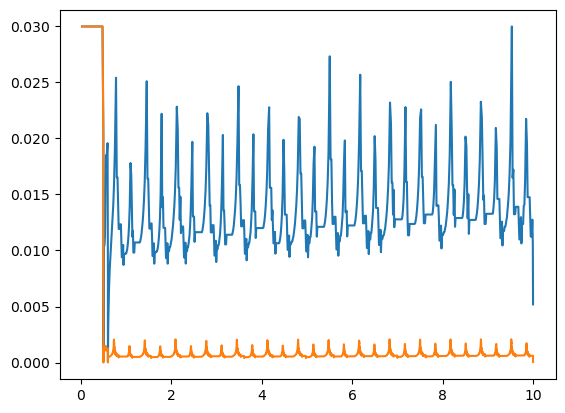

In [5]:
# plt.plot(t_itm[1:],np.diff(t_itm))
# plt.plot(t_pece_normal[1:],np.diff(t_pece_normal))
plt.plot(t_pece_predict[1:],np.diff(t_pece_predict))
plt.plot(t_pece_dt[1:],np.diff(t_pece_dt))

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Set global style settings for consistent appearance
plt.rcParams.update({
    "font.family": "serif",  # Use a serif font like Times New Roman
    "font.size": 12,         # Set font size appropriate for academic papers
    "axes.titlesize": 12,    # Title font size
    "axes.labelsize": 10,    # Axis label font size
    "xtick.labelsize": 12,    # X-tick label size
    "ytick.labelsize": 12,    # Y-tick label size
    "legend.fontsize": 12,    # Legend font size
    "figure.dpi": 300,       # High resolution for publications
    "savefig.format": "png", # Default format for saving
    "savefig.dpi": 300,      # Save figures with high resolution
    "text.usetex": False     # Turn off LaTeX for simplicity (can enable if needed)
})

# Function to create a multi-panel figure
def create_multi_panel_figure(data, xlabels, ylabels, titles, legends=None, save_path=None):
    """
    Create a multi-panel figure with multiple subplots.

    Parameters:
        - data: List of tuples [(x1, y1), (x2, y2), ...] for each subplot.
        - xlabels: List of x-axis labels for each subplot.
        - ylabels: List of y-axis labels for each subplot.
        - titles: List of titles for each subplot.
        - legends: List of legend labels for each subplot (optional).
        - save_path: Filepath to save the figure (optional).
    """
    n = len(data)  # Number of subplots
    fig, axs = plt.subplots(n, 1, figsize=(6, 4 * n), sharex=False)  # One column, `n` rows

    # Handle single subplot case
    if n == 1:
        axs = [axs]

    for i, ax in enumerate(axs):
        x, y = data[i]
        if isinstance(y[0], (list, np.ndarray)):  # Multiple lines in one plot
            for j, y_data in enumerate(y):
                label = legends[i][j] if legends else None
                ax.plot(x, y_data, label=label, linewidth=1.5)
        else:  # Single line
            ax.plot(x, y, label=legends[i][0] if legends else None, linewidth=1.5)

        # Set labels and titles
        ax.set_xlabel(xlabels[i])
        ax.set_ylabel(ylabels[i])
        ax.set_title(titles[i], pad=10)

        # Grid and minor ticks
        ax.grid(visible=True, linestyle='--', linewidth=0.5, alpha=0.7)
        ax.minorticks_on()
        ax.tick_params(axis='both', which='major', direction='in', length=6, width=0.8)
        ax.tick_params(axis='both', which='minor', direction='in', length=4, width=0.5)

        # Add legend if provided
        if legends and legends[i]:
            ax.legend(loc='best', frameon=True, edgecolor='black')

    # Adjust layout
    fig.tight_layout()

    # Save or show plot
    if save_path:
        plt.savefig(save_path, bbox_inches='tight')
    else:
        plt.show()

# # Example usage
# if __name__ == "__main__":
#     # Example data for multiple plots
#     x = np.linspace(0, 10, 100)
#     data = [
#         (x, [np.sin(x), np.cos(x)]),  # First subplot: sin(x) and cos(x)
#         (x, [np.exp(-0.1 * x), np.exp(-0.2 * x)])  # Second subplot: two decaying exponentials
#     ]
#     xlabels = ["Time (s)", "Time (s)"]
#     ylabels = ["Amplitude", "Amplitude"]
#     titles = ["Trigonometric Functions", "Decaying Exponentials"]
#     legends = [["sin(x)", "cos(x)"], ["exp(-0.1x)", "exp(-0.2x)"]]

#     # Create the multi-panel figure
#     create_multi_panel_figure(data, xlabels, ylabels, titles, legends, save_path="multi_panel_figure.png")


In [7]:
plt.rcParams.update({
    "font.family": "serif",  # Use a serif font like Times New Roman
    "font.size": 12,         # Set font size appropriate for academic papers
    "axes.titlesize": 12,    # Title font size
    "axes.labelsize": 12,    # Axis label font size
    "xtick.labelsize": 12,    # X-tick label size
    "ytick.labelsize": 12,    # Y-tick label size
    "legend.fontsize": 12,    # Legend font size
    "figure.dpi": 300,       # High resolution for publications
    "savefig.format": "png", # Default format for saving
    "savefig.dpi": 300,      # Save figures with high resolution
    "text.usetex": False     # Turn off LaTeX for simplicity (can enable if needed)
})

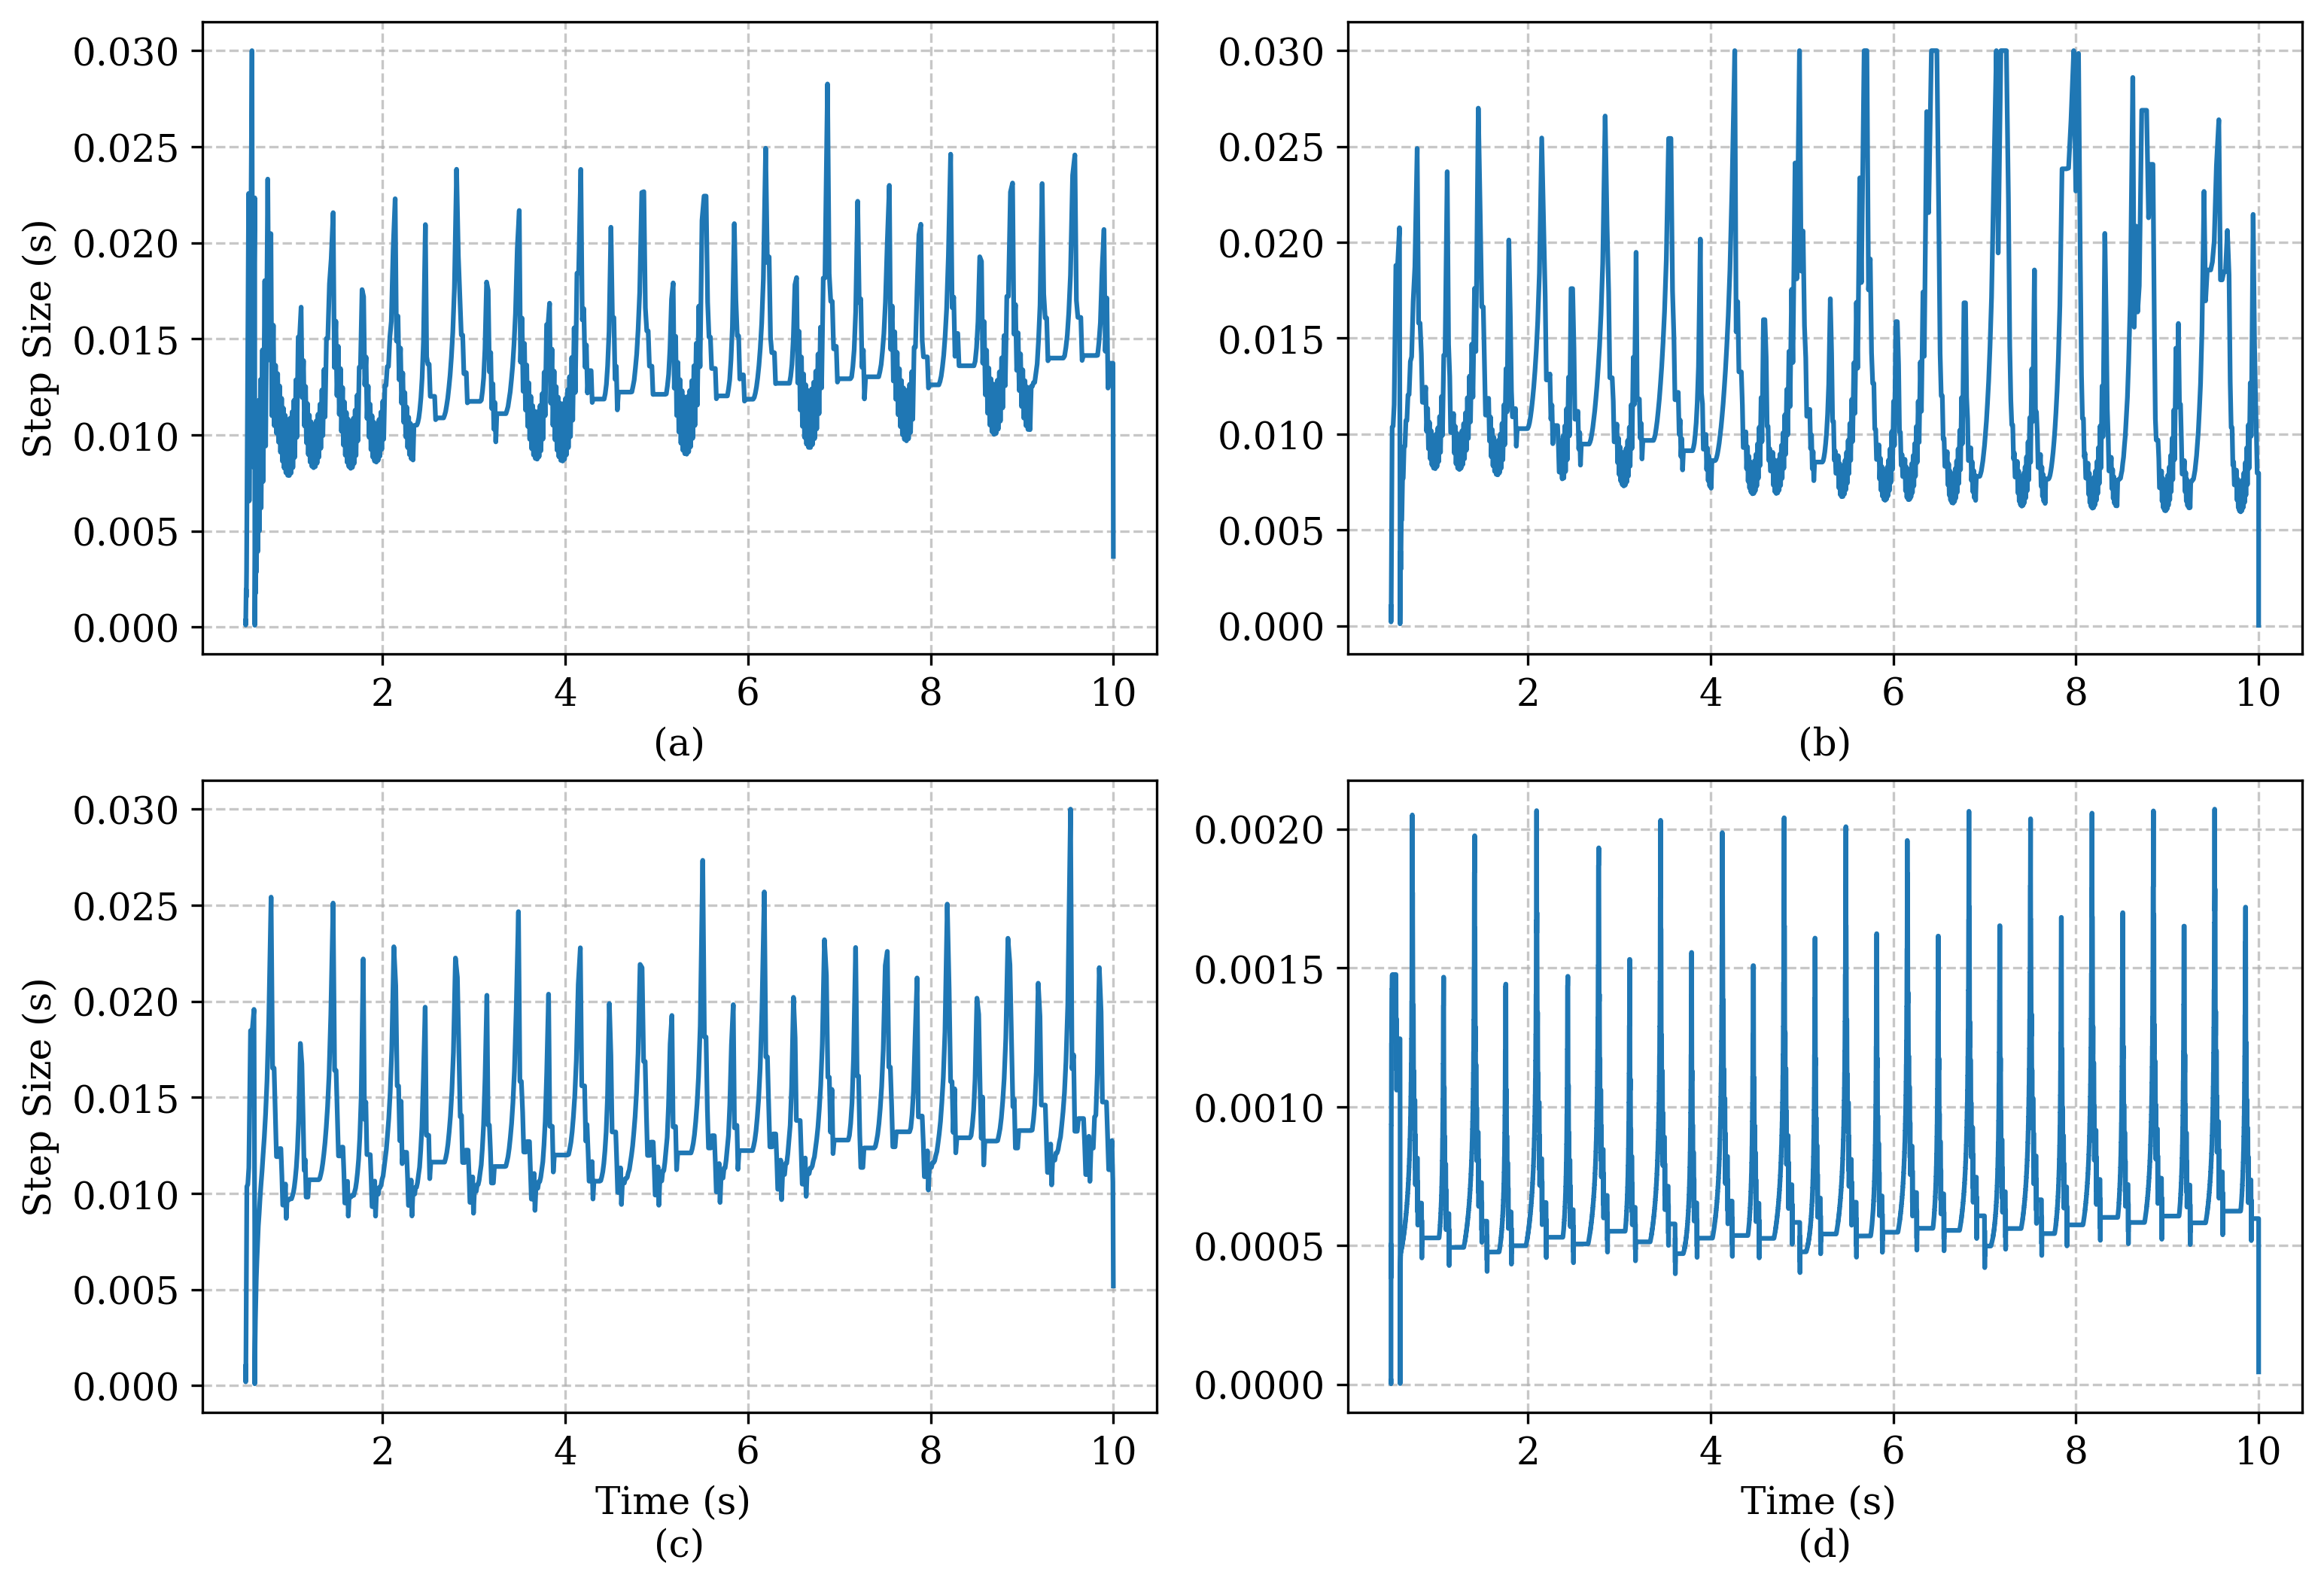

In [12]:
fig, axs = plt.subplots(2, 2, figsize=(12,8), sharex=False)

axs[0,0].plot(t_itm[20:],np.diff(t_itm)[19:], linewidth=1.5)
# axs[0,0].set_title('Time Step Differences (ITM)')
axs[0,0].set_xlabel('(a)')
axs[0,0].set_ylabel('Step Size (s)')
axs[0,0].grid(True, linestyle='--', alpha=0.7)  # Add gridlines

axs[0,1].plot(t_pece_normal[20:],np.diff(t_pece_normal)[19:], linewidth=1.5)
# axs[0,0].set_title('Time Step Differences (ITM)')
axs[0,1].set_xlabel('(b)')
# axs[0,1].set_ylabel('Time Step Size (s)')
axs[0,1].grid(True, linestyle='--', alpha=0.7)  # Add gridlines

axs[1,0].plot(t_pece_predict[20:],np.diff(t_pece_predict)[19:], linewidth=1.5)
# axs[0,0].set_title('Time Step Differences (ITM)')
axs[1,0].set_xlabel('Time (s) \n(c)')
axs[1,0].set_ylabel('Step Size (s)')
axs[1,0].grid(True, linestyle='--', alpha=0.7)  # Add gridlines

axs[1,1].plot(t_pece_dt[20:],np.diff(t_pece_dt)[19:], linewidth=1.5)
# axs[0,0].set_title('Time Step Differences (ITM)')
axs[1,1].set_xlabel('Time (s) \n(d)')
# axs[0,1].set_ylabel('Time Step Size (s)')
axs[1,1].grid(True, linestyle='--', alpha=0.7)  # Add gridlines

# fig.supxlabel("shared")
# fig.supylabel("shared")



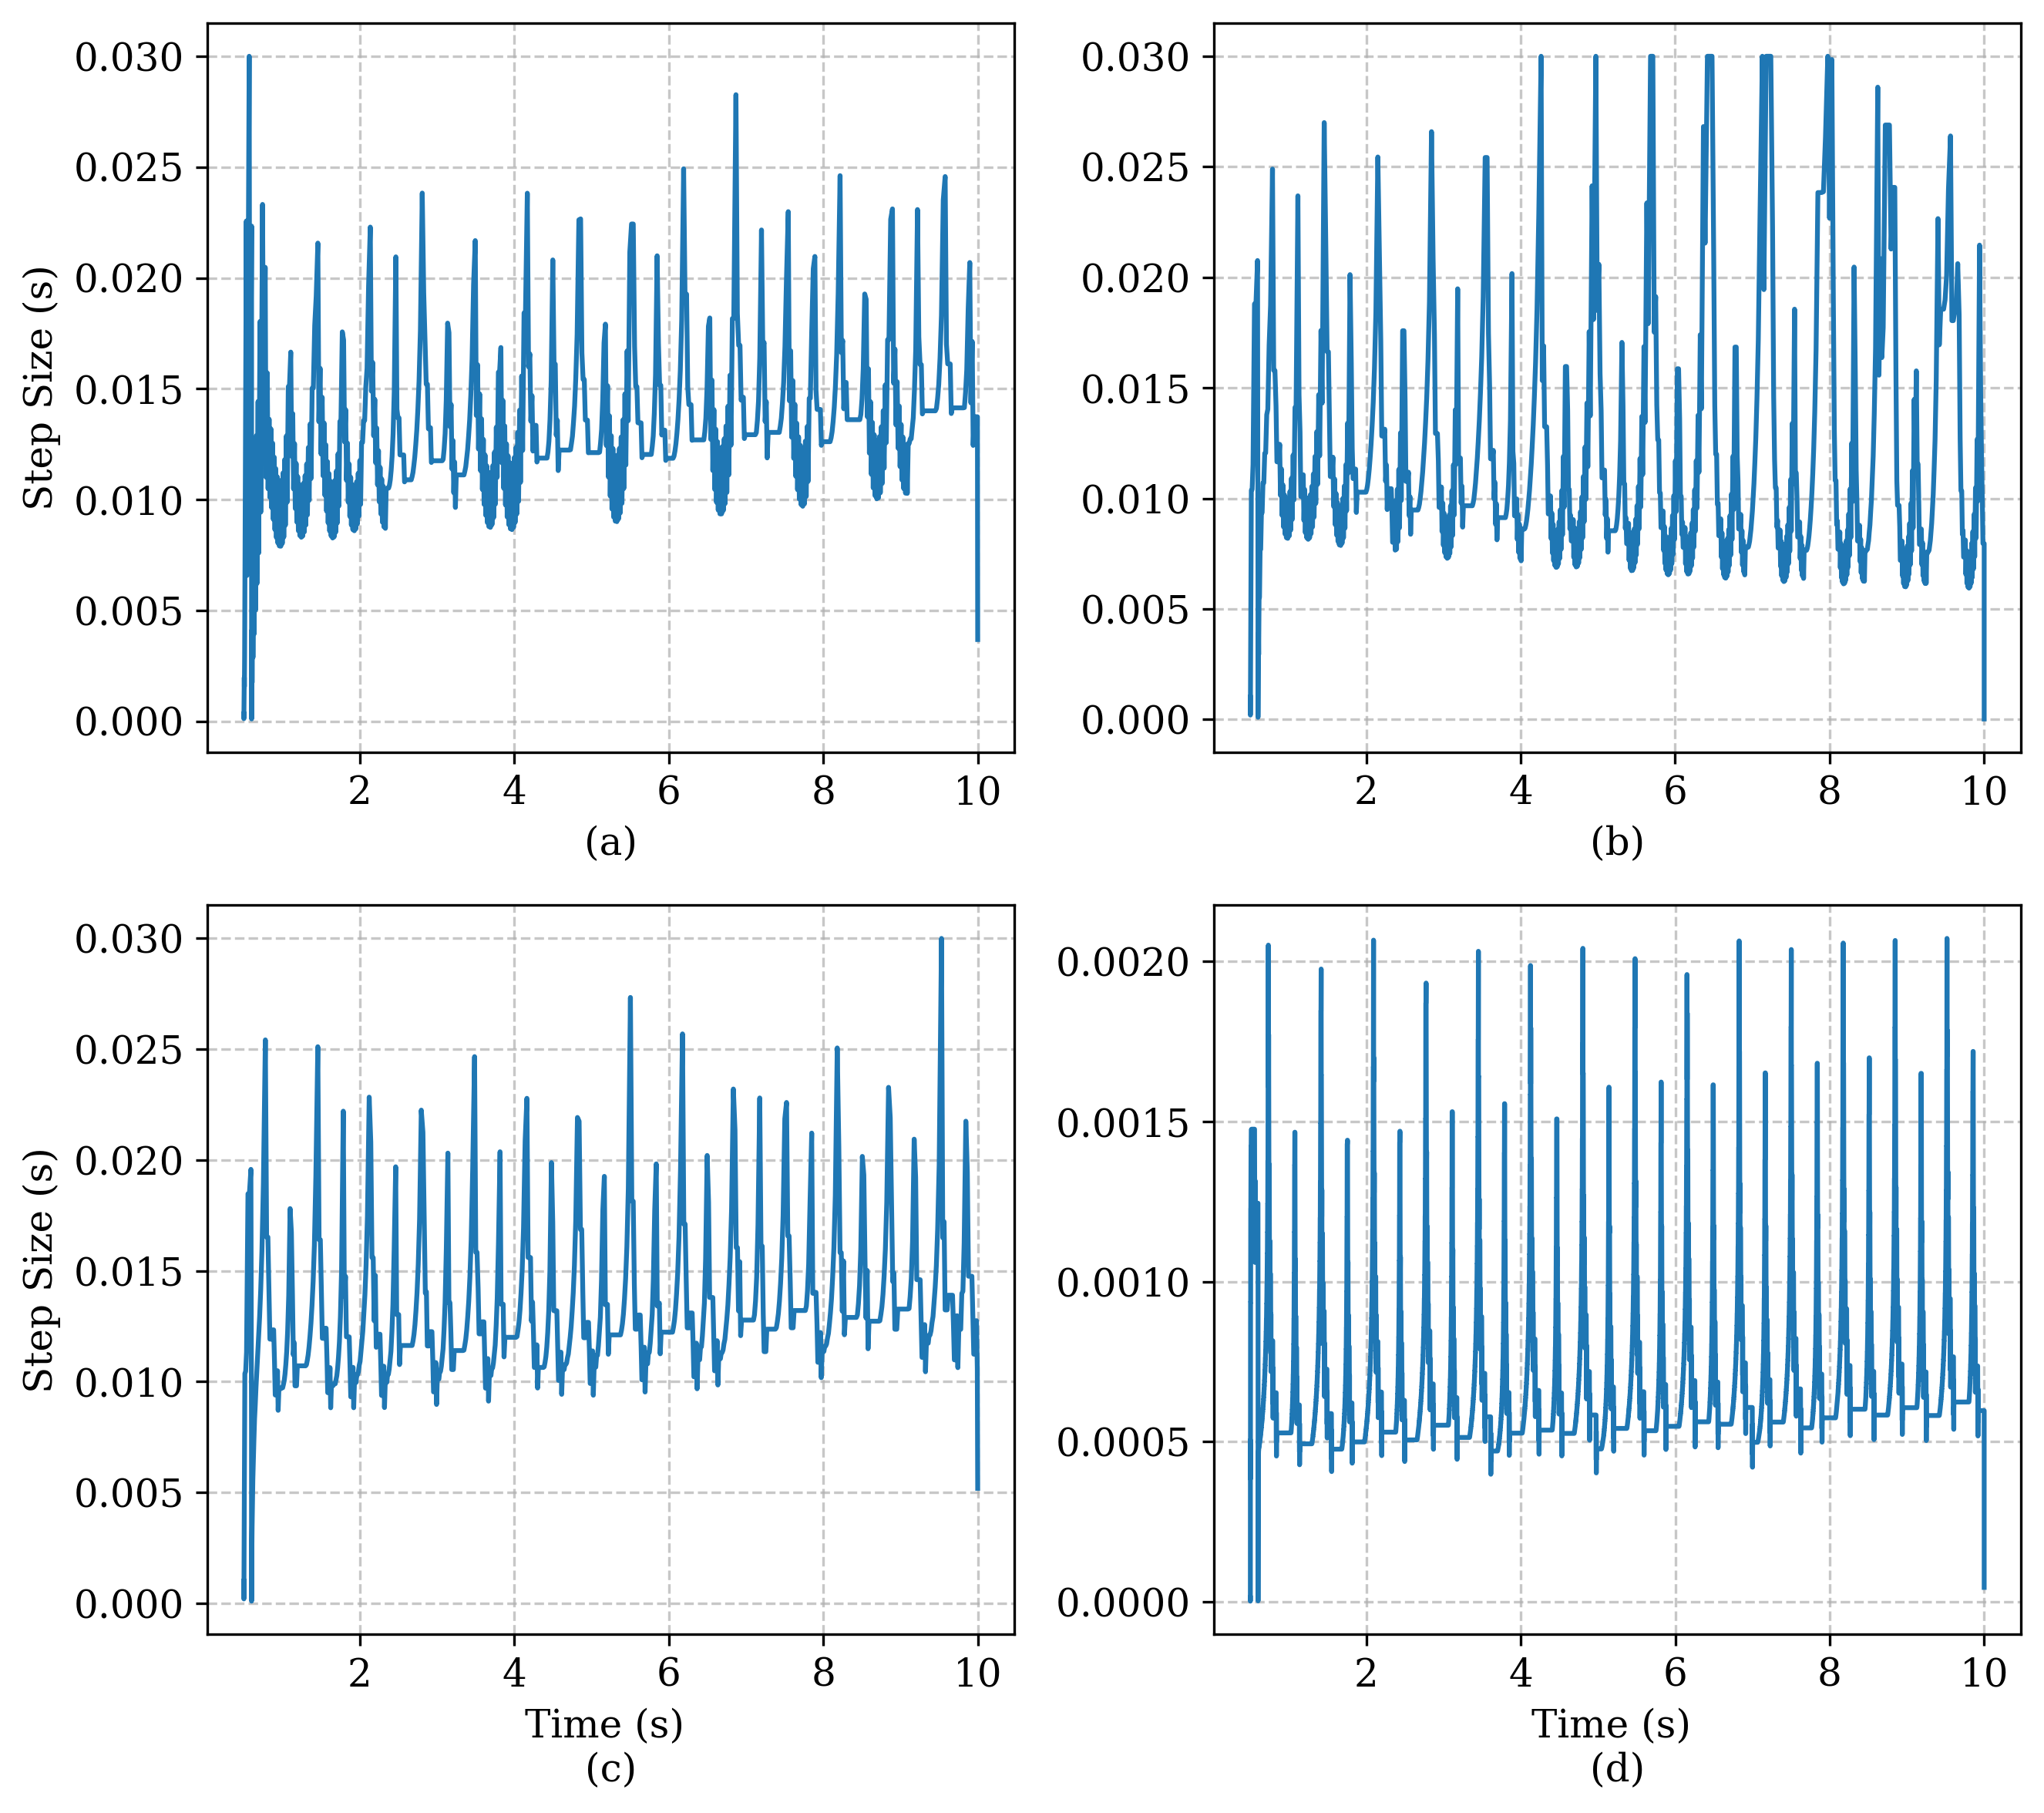

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Update rcParams for consistent style across the plot
plt.rcParams.update({
    "font.family": "serif",  # Use a serif font like Times New Roman
    "font.size": 12,         # Set font size appropriate for academic papers
    "axes.titlesize": 12,    # Title font size
    "axes.labelsize": 12,    # Axis label font size
    "xtick.labelsize": 12,    # X-tick label size
    "ytick.labelsize": 12,    # Y-tick label size
    "legend.fontsize": 12,    # Legend font size
    "figure.dpi": 300,       # High resolution for publications
    "savefig.format": "png", # Default format for saving
    "savefig.dpi": 300,      # Save figures with high resolution
    "text.usetex": False     # Turn off LaTeX for simplicity (can enable if needed)
})

# Example data for demonstration
# t_itm = np.linspace(0, 10, 100)
# t_pece_normal = np.linspace(0, 10, 100)
# t_pece_predict = np.linspace(0, 10, 100)
# t_pece_dt = np.linspace(0, 10, 100)

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(9,), sharex=False)

axs[0, 0].plot(t_itm[20:], np.diff(t_itm)[19:], linewidth=1.5)
axs[0, 0].set_xlabel('(a)')
axs[0, 0].set_ylabel('Step Size (s)')
axs[0, 0].grid(True, linestyle='--', alpha=0.7)  # Add gridlines

axs[0, 1].plot(t_pece_normal[20:], np.diff(t_pece_normal)[19:], linewidth=1.5)
axs[0, 1].set_xlabel('(b)')
axs[0, 1].grid(True, linestyle='--', alpha=0.7)  # Add gridlines

axs[1, 0].plot(t_pece_predict[20:], np.diff(t_pece_predict)[19:], linewidth=1.5)
axs[1, 0].set_xlabel('Time (s) \n(c)')
axs[1, 0].set_ylabel('Step Size (s)')
axs[1, 0].grid(True, linestyle='--', alpha=0.7)  # Add gridlines

axs[1, 1].plot(t_pece_dt[20:], np.diff(t_pece_dt)[19:], linewidth=1.5)
axs[1, 1].set_xlabel('Time (s) \n(d)')
axs[1, 1].grid(True, linestyle='--', alpha=0.7)  # Add gridlines

# Optional: Add shared labels for the figure
# fig.supxlabel("Time (s)", fontsize=10)
# fig.supylabel("Step Size (s)", fontsize=10)

# Adjust layout
fig.tight_layout()

# Save or show the figure
# plt.savefig("example_figure.png", bbox_inches="tight")  # Save the figure
# plt.show()  # Show the figure

# plt.savefig("smib_dt_improved.pdf")



In [26]:
omega_itm = [arr[3] for arr in smib_itm['data']]
omega_pece_normal = [arr[3] for arr in smib_pece_normal['data']]
omega_pece_predict = [arr[3] for arr in smib_pece_predict['data']]
omega_pece_dt = [arr[3] for arr in smib_pece_small_dt['data']]

Text(0, 0.5, 'ω (p.u.)')

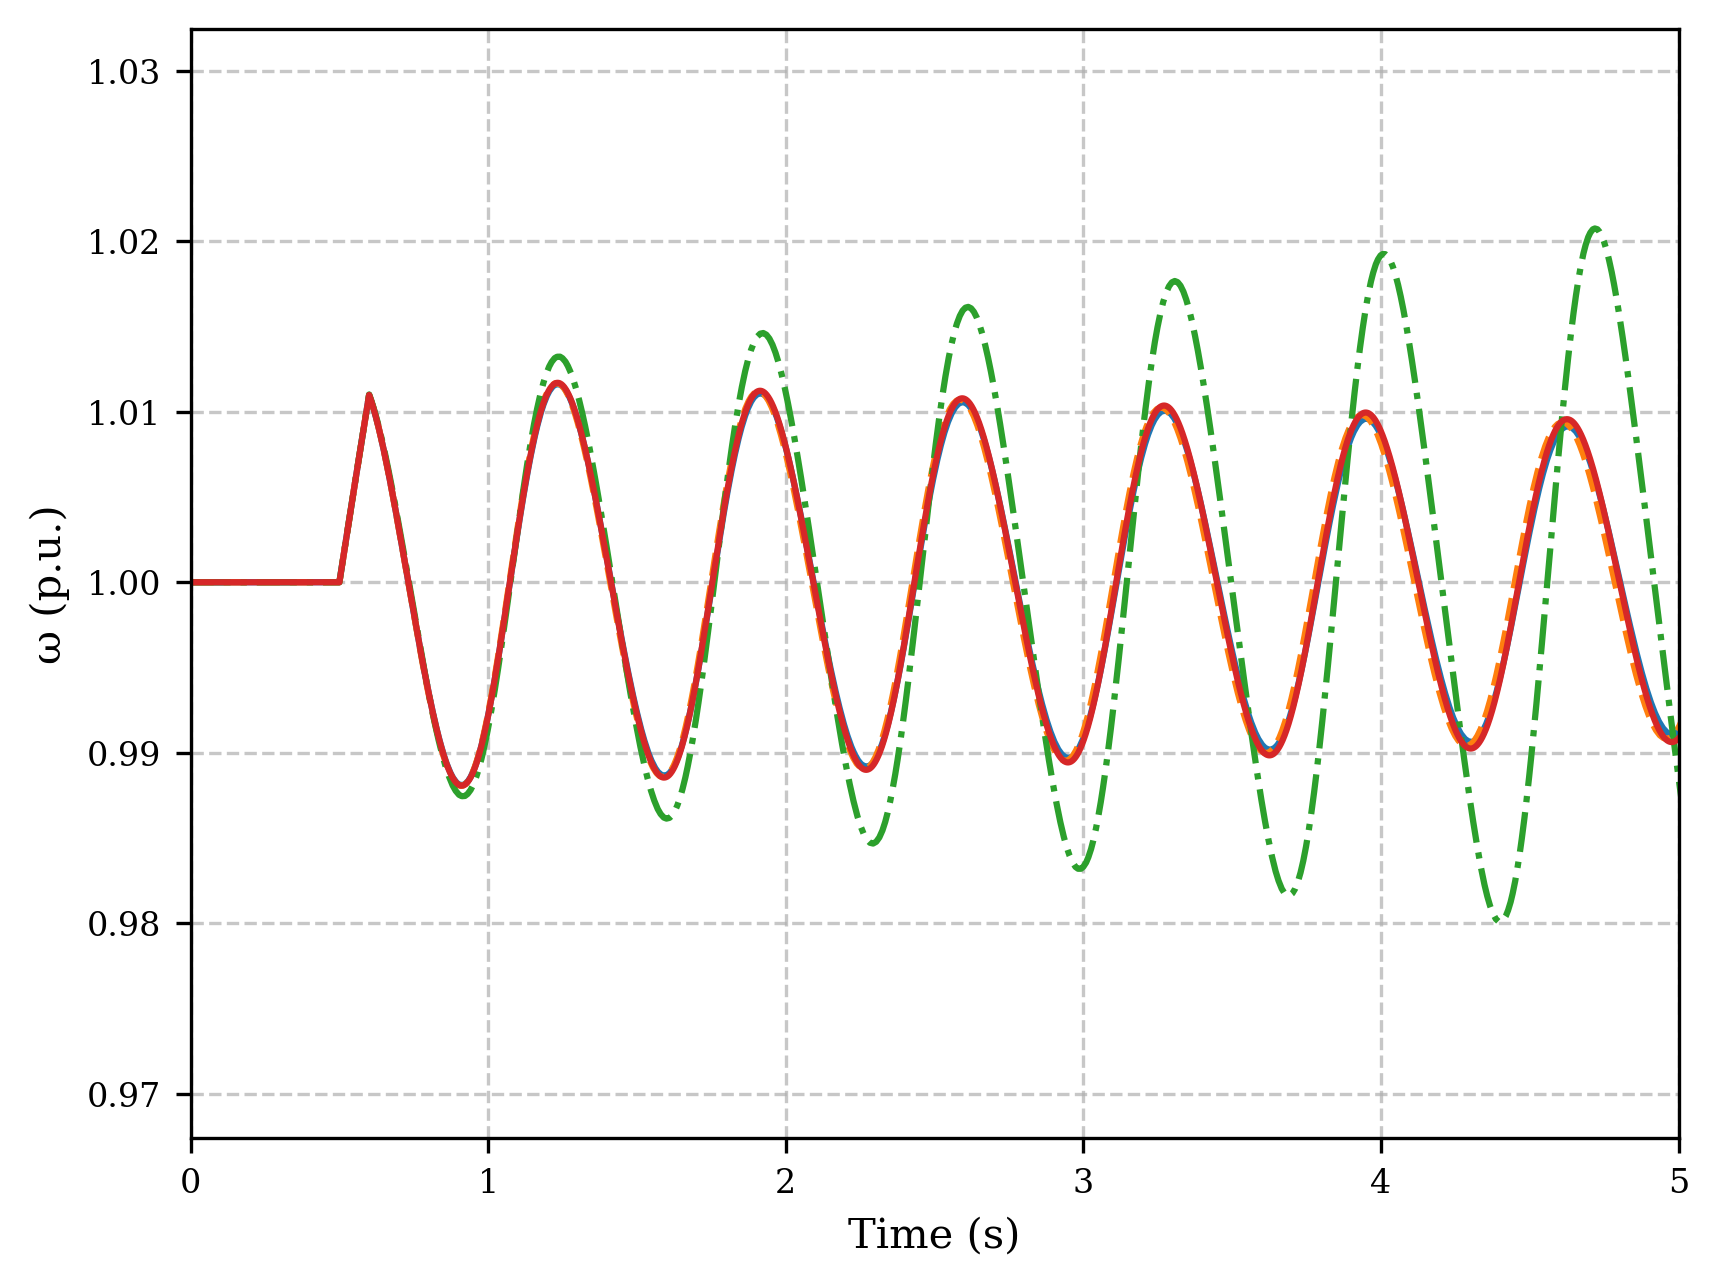

In [11]:
plt.plot(t_itm, omega_itm)
plt.plot(t_pece_predict, omega_pece_predict, linestyle='--')
plt.plot(t_pece_normal, omega_pece_normal, linestyle='-.')
plt.plot(t_pece_dt, omega_pece_dt, linestyle='-')
plt.xlim(0, 5)  # Set x-axis limits from 0 to 5 seconds
plt.grid(True, linestyle='--', alpha=0.7)  # Optional: Add grid for better readability
plt.xlabel('Time (s)')
plt.ylabel('ω (p.u.)')

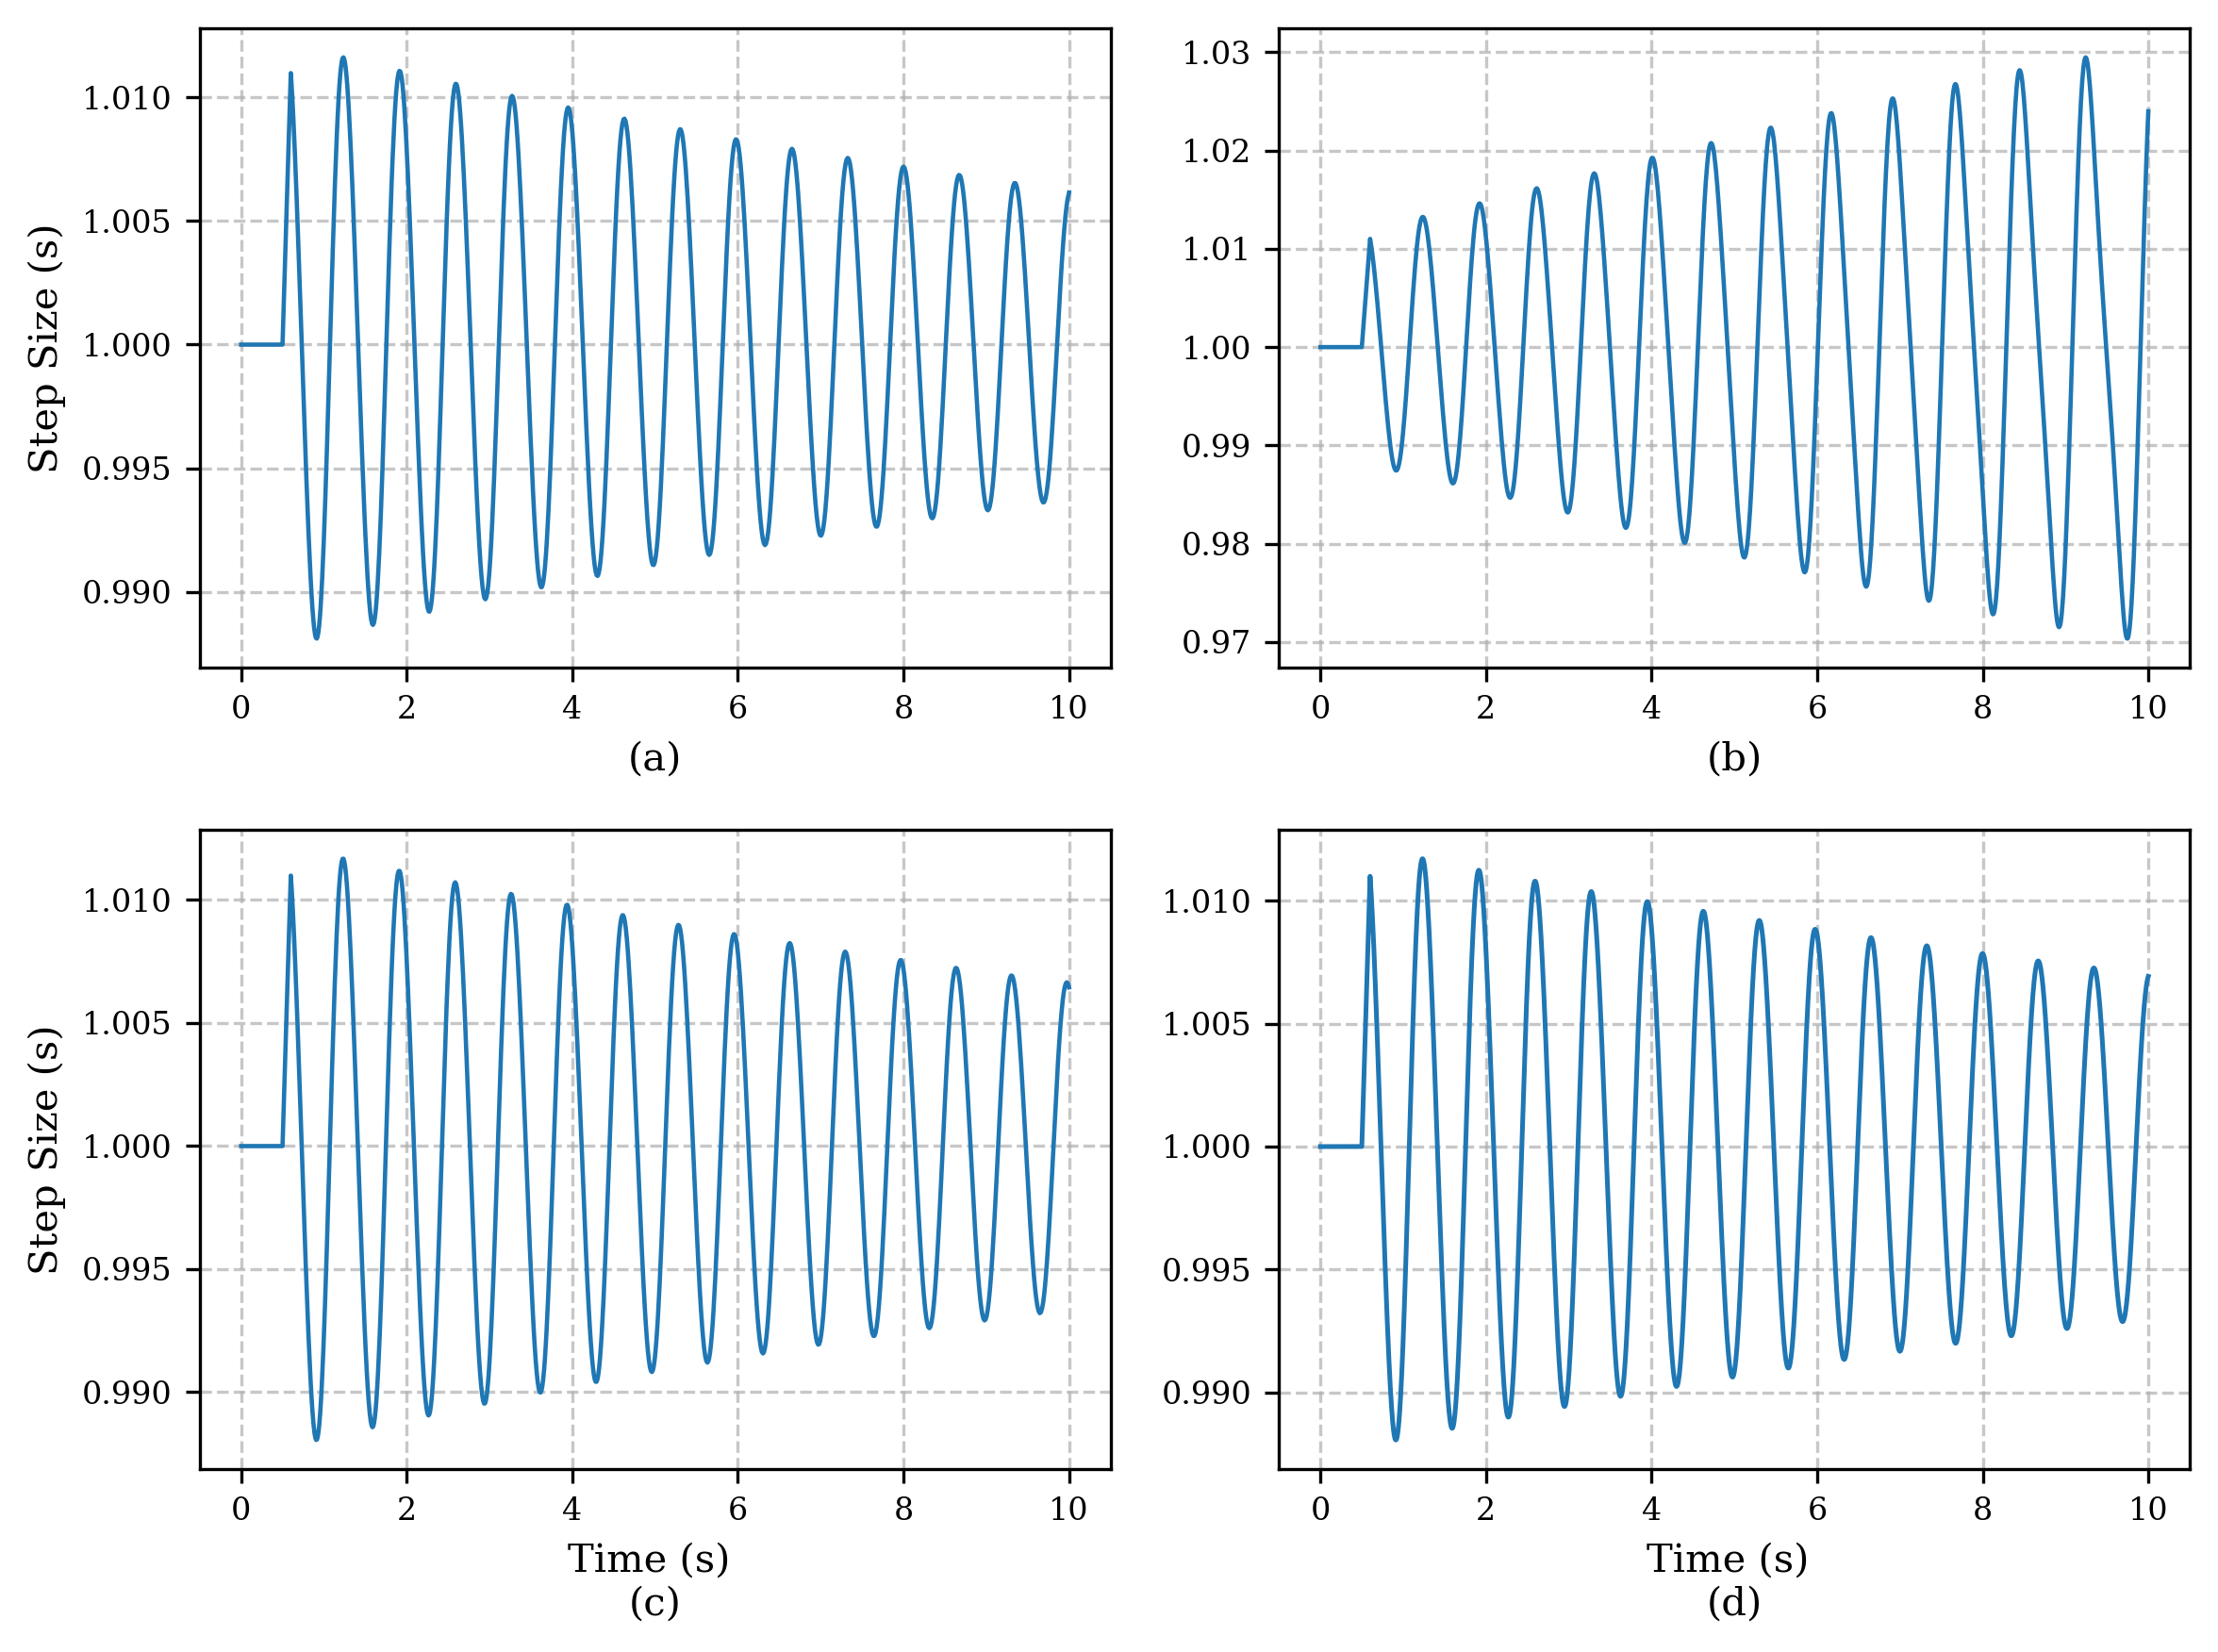

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Update rcParams for consistent style across the plot
plt.rcParams.update({
    "font.family": "serif",  # Use a serif font like Times New Roman
    "font.size": 12,         # Set font size appropriate for academic papers
    "axes.titlesize": 12,    # Title font size
    "axes.labelsize": 10,    # Axis label font size
    "xtick.labelsize": 8,    # X-tick label size
    "ytick.labelsize": 8,    # Y-tick label size
    "legend.fontsize": 8,    # Legend font size
    "figure.dpi": 300,       # High resolution for publications
    "savefig.format": "png", # Default format for saving
    "savefig.dpi": 300,      # Save figures with high resolution
    "text.usetex": False     # Turn off LaTeX for simplicity (can enable if needed)
})

# Example data for demonstration
# t_itm = np.linspace(0, 10, 100)
# t_pece_normal = np.linspace(0, 10, 100)
# t_pece_predict = np.linspace(0, 10, 100)
# t_pece_dt = np.linspace(0, 10, 100)

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(8, 6), sharex=False)

axs[0, 0].plot(t_itm, omega_itm, linewidth=1.1)
axs[0, 0].set_xlabel('(a)')
axs[0, 0].set_ylabel('Step Size (s)')
axs[0, 0].grid(True, linestyle='--', alpha=0.7)  # Add gridlines

axs[0, 1].plot(t_pece_normal, omega_pece_normal, linewidth=1.1)
axs[0, 1].set_xlabel('(b)')
axs[0, 1].grid(True, linestyle='--', alpha=0.7)  # Add gridlines

axs[1, 0].plot(t_pece_predict, omega_pece_predict, linewidth=1.1)
axs[1, 0].set_xlabel('Time (s) \n(c)')
axs[1, 0].set_ylabel('Step Size (s)')
axs[1, 0].grid(True, linestyle='--', alpha=0.7)  # Add gridlines

axs[1, 1].plot(t_pece_dt, omega_pece_dt, linewidth=1.2)
axs[1, 1].set_xlabel('Time (s) \n(d)')
axs[1, 1].grid(True, linestyle='--', alpha=0.7)  # Add gridlines

# Optional: Add shared labels for the figure
# fig.supxlabel("Time (s)", fontsize=10)
# fig.supylabel("Step Size (s)", fontsize=10)

# Adjust layout
fig.tight_layout()

# Save or show the figure
# plt.savefig("example_figure.png", bbox_inches="tight")  # Save the figure
plt.show()  # Show the figure

# plt.savefig("smib_dt.pdf")


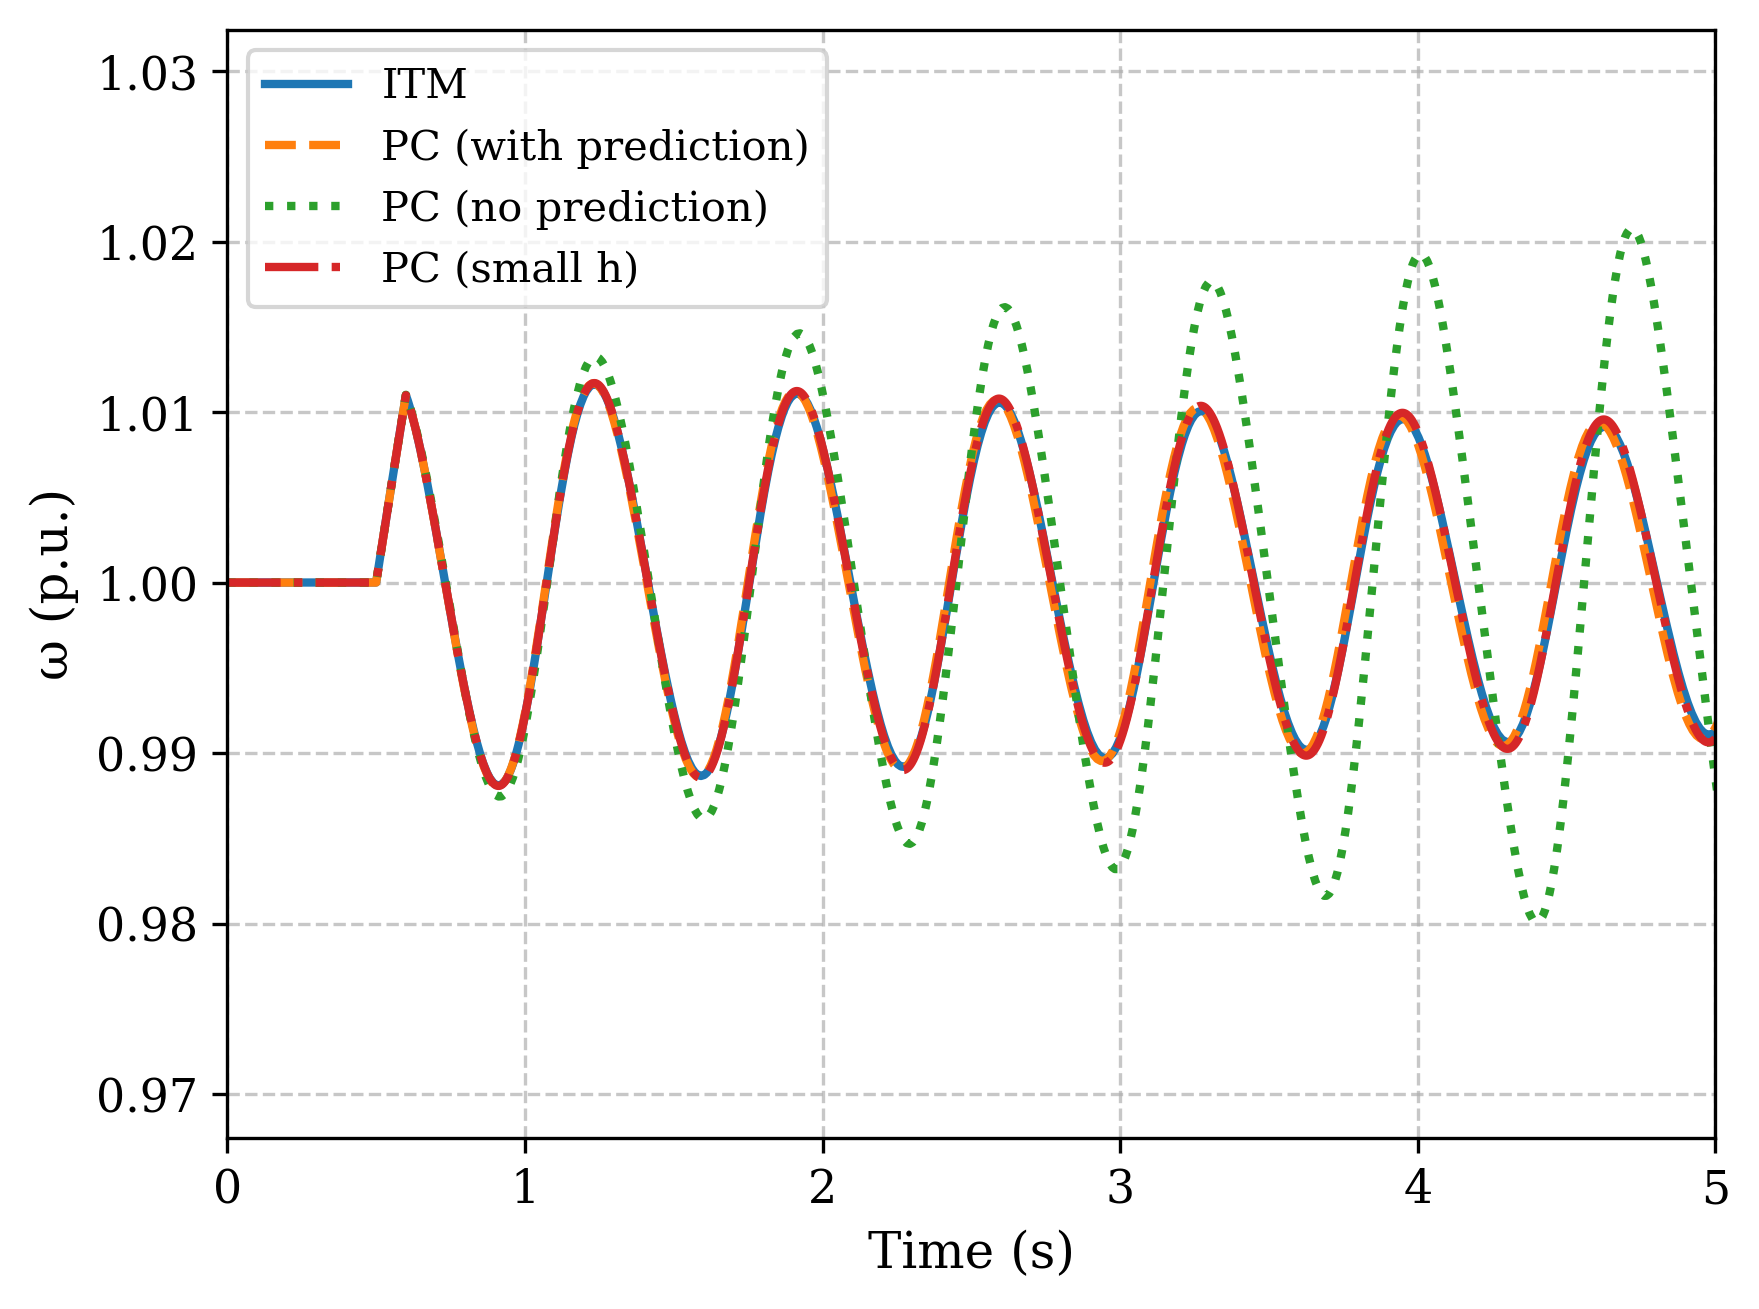

In [30]:
plt.rcParams.update({
    "font.family": "serif",  # Use a serif font like Times New Roman
    "font.size": 12,         # Set font size appropriate for academic papers
    "axes.titlesize": 12,    # Title font size
    "axes.labelsize": 12,    # Axis label font size
    "xtick.labelsize": 11,    # X-tick label size
    "ytick.labelsize": 11,    # Y-tick label size
    "legend.fontsize": 10,    # Legend font size
    "figure.dpi": 300,       # High resolution for publications
    "savefig.format": "png", # Default format for saving
    "savefig.dpi": 300,      # Save figures with high resolution
    "text.usetex": False     # Turn off LaTeX for simplicity (can enable if needed)
})


plt.plot(t_itm, omega_itm, linestyle='-', linewidth=2, label='ITM')
plt.plot(t_pece_predict, omega_pece_predict, linestyle='--', linewidth=2, label='PC (with prediction)')
plt.plot(t_pece_normal, omega_pece_normal, linestyle=':', linewidth=2, label='PC (no prediction)')
plt.plot(t_pece_dt, omega_pece_dt, linestyle='-.', linewidth=2, label='PC (small h)')
plt.xlim(0, 5)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xlabel('Time (s)')
plt.ylabel('ω (p.u.)')
plt.legend()
fig.tight_layout()

plt.savefig("smib_omega_improved.pdf")



In [32]:
smib_itm = np.load("npcc_NoZero_out_itm.npz")
smib_pece_normal = np.load("npcc_NoZero_out_pece_normal.npz")
smib_pece_predict = np.load("npcc_NoZero_out_pece_predict.npz")
# smib_pece_small_dt = np.load("npcc_NoZero_out_pece_small_dt.npz")

In [33]:
t_itm = [arr[0] for arr in smib_itm['data']]
t_pece_normal = [arr[0] for arr in smib_pece_normal['data']]
t_pece_predict = [arr[0] for arr in smib_pece_predict['data']]

In [34]:
n_vars = smib_itm['data'].shape[1]  # number of variables
n_points = len(smib_itm['data'])    # number of time points
var_itm = np.zeros((n_vars, n_points))  # initialize array with zeros

n_vars = smib_pece_normal['data'].shape[1]  # number of variables
n_points = len(smib_pece_normal['data'])    # number of time points
var_pece_normal = np.zeros((n_vars, n_points))  # initialize array with zeros

In [35]:
var_itm = np.array(smib_itm['data']).T 

In [36]:
var_pece_normal = np.array(smib_pece_normal['data']).T  # Transpose to get variables in rows

In [37]:
var_pece_predict = np.array(smib_pece_predict['data']).T

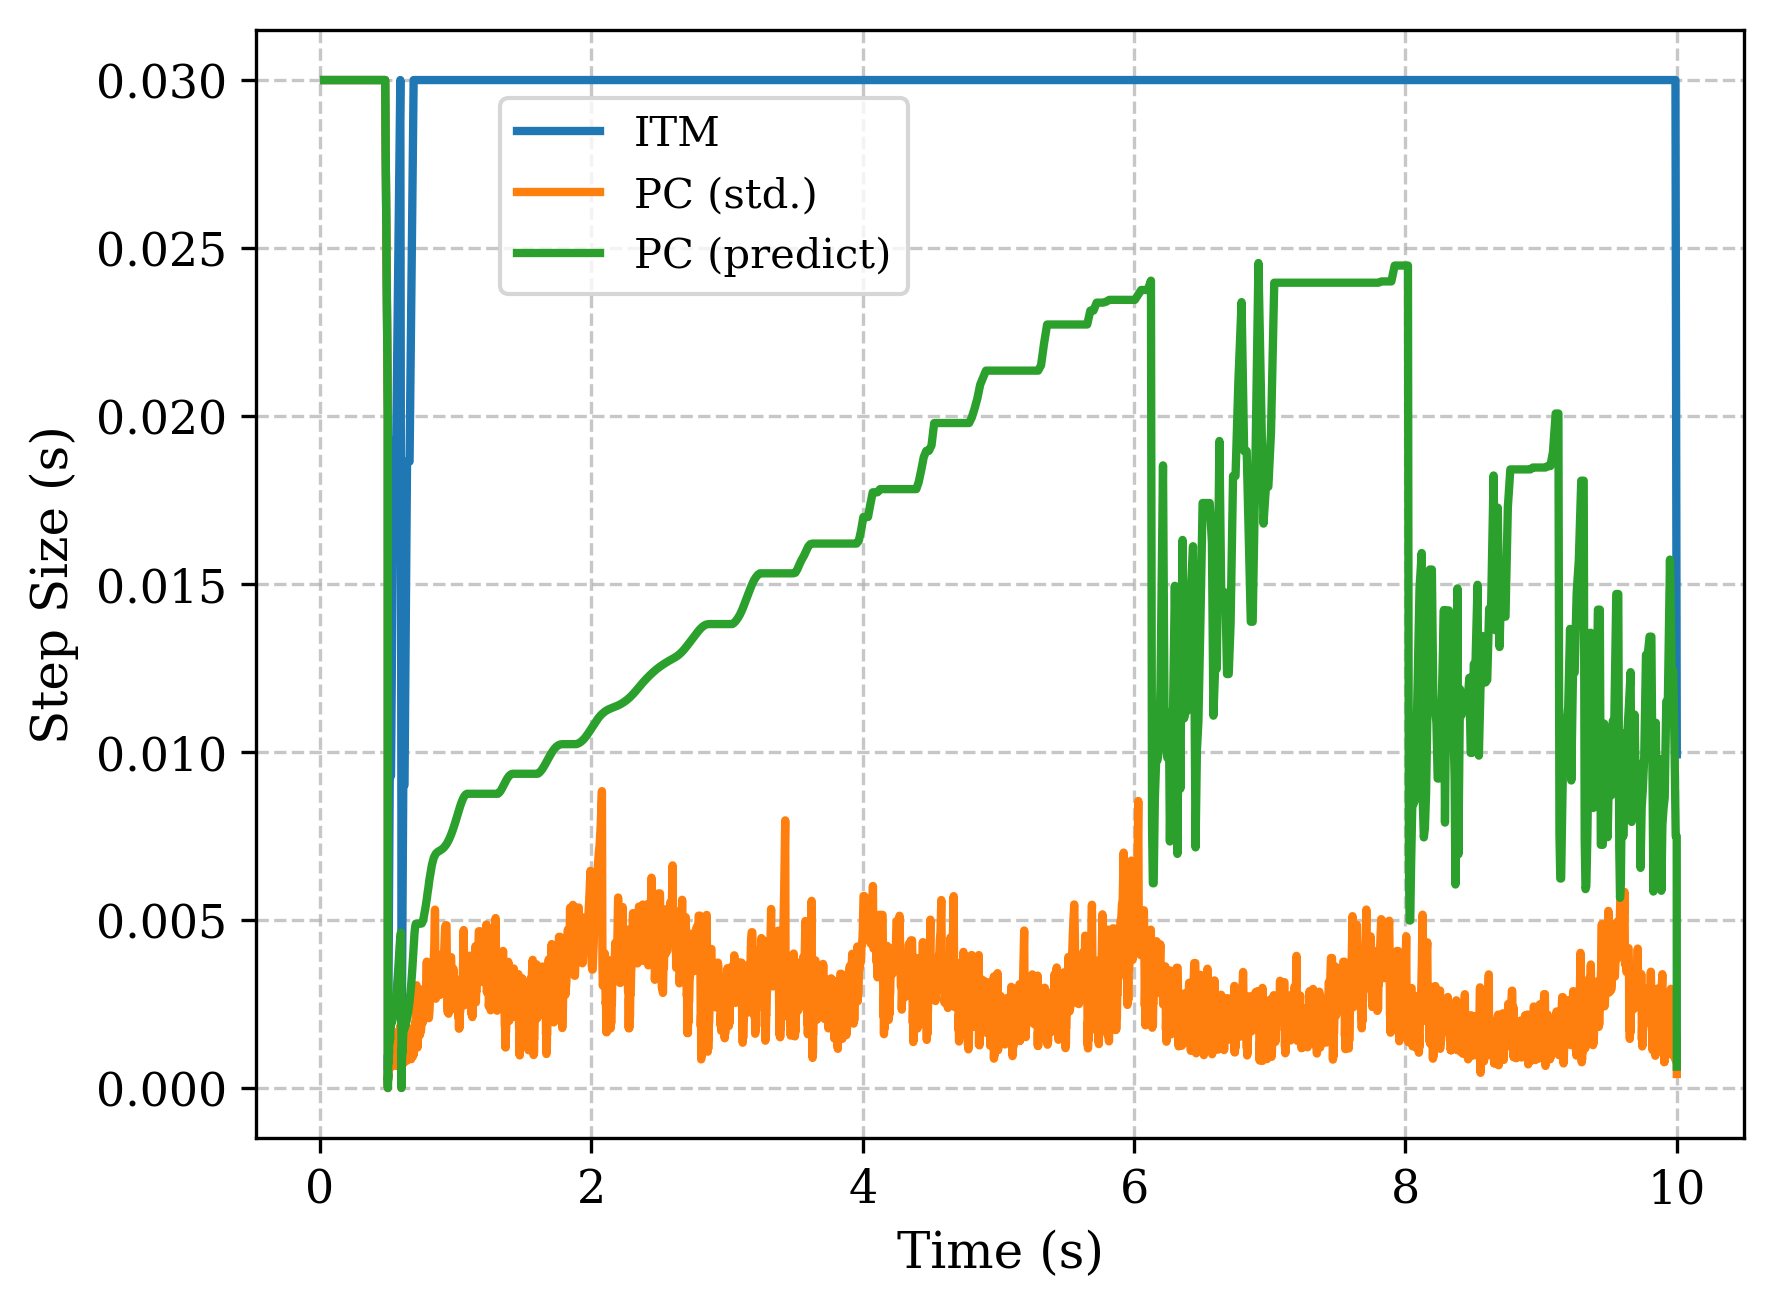

In [39]:
plt.rcParams.update({
    "font.family": "serif",  # Use a serif font like Times New Roman
    "font.size": 12,         # Set font size appropriate for academic papers
    "axes.titlesize": 12,    # Title font size
    "axes.labelsize": 12,    # Axis label font size
    "xtick.labelsize": 11,    # X-tick label size
    "ytick.labelsize": 11,    # Y-tick label size
    "legend.fontsize": 10,    # Legend font size
    "figure.dpi": 300,       # High resolution for publications
    "savefig.format": "png", # Default format for saving
    "savefig.dpi": 300,      # Save figures with high resolution
    "text.usetex": False     # Turn off LaTeX for simplicity (can enable if needed)
})

plt.plot(t_itm[1:],np.diff(t_itm), label='ITM', linewidth=2)
plt.plot(t_pece_normal[1:],np.diff(t_pece_normal), label='PC (std.)', linewidth=2)
plt.plot(t_pece_predict[1:],np.diff(t_pece_predict), label='PC (predict)', linewidth=2)
# plt.plot(t_pece_dt[1:],np.diff(t_pece_dt))
plt.grid(True, linestyle='--', alpha=0.7)
plt.xlabel('Time (s)')
plt.ylabel('Step Size (s)')
plt.legend(loc='center left', bbox_to_anchor=(0.15, 0.85))
fig.tight_layout()

plt.savefig("npcc_dt_improved.pdf")

In [21]:
omega_itm = [arr[75] for arr in smib_itm['data']]
omega_pece_normal = [arr[75] for arr in smib_pece_normal['data']]
omega_pece_predict = [arr[75] for arr in smib_pece_predict['data']]

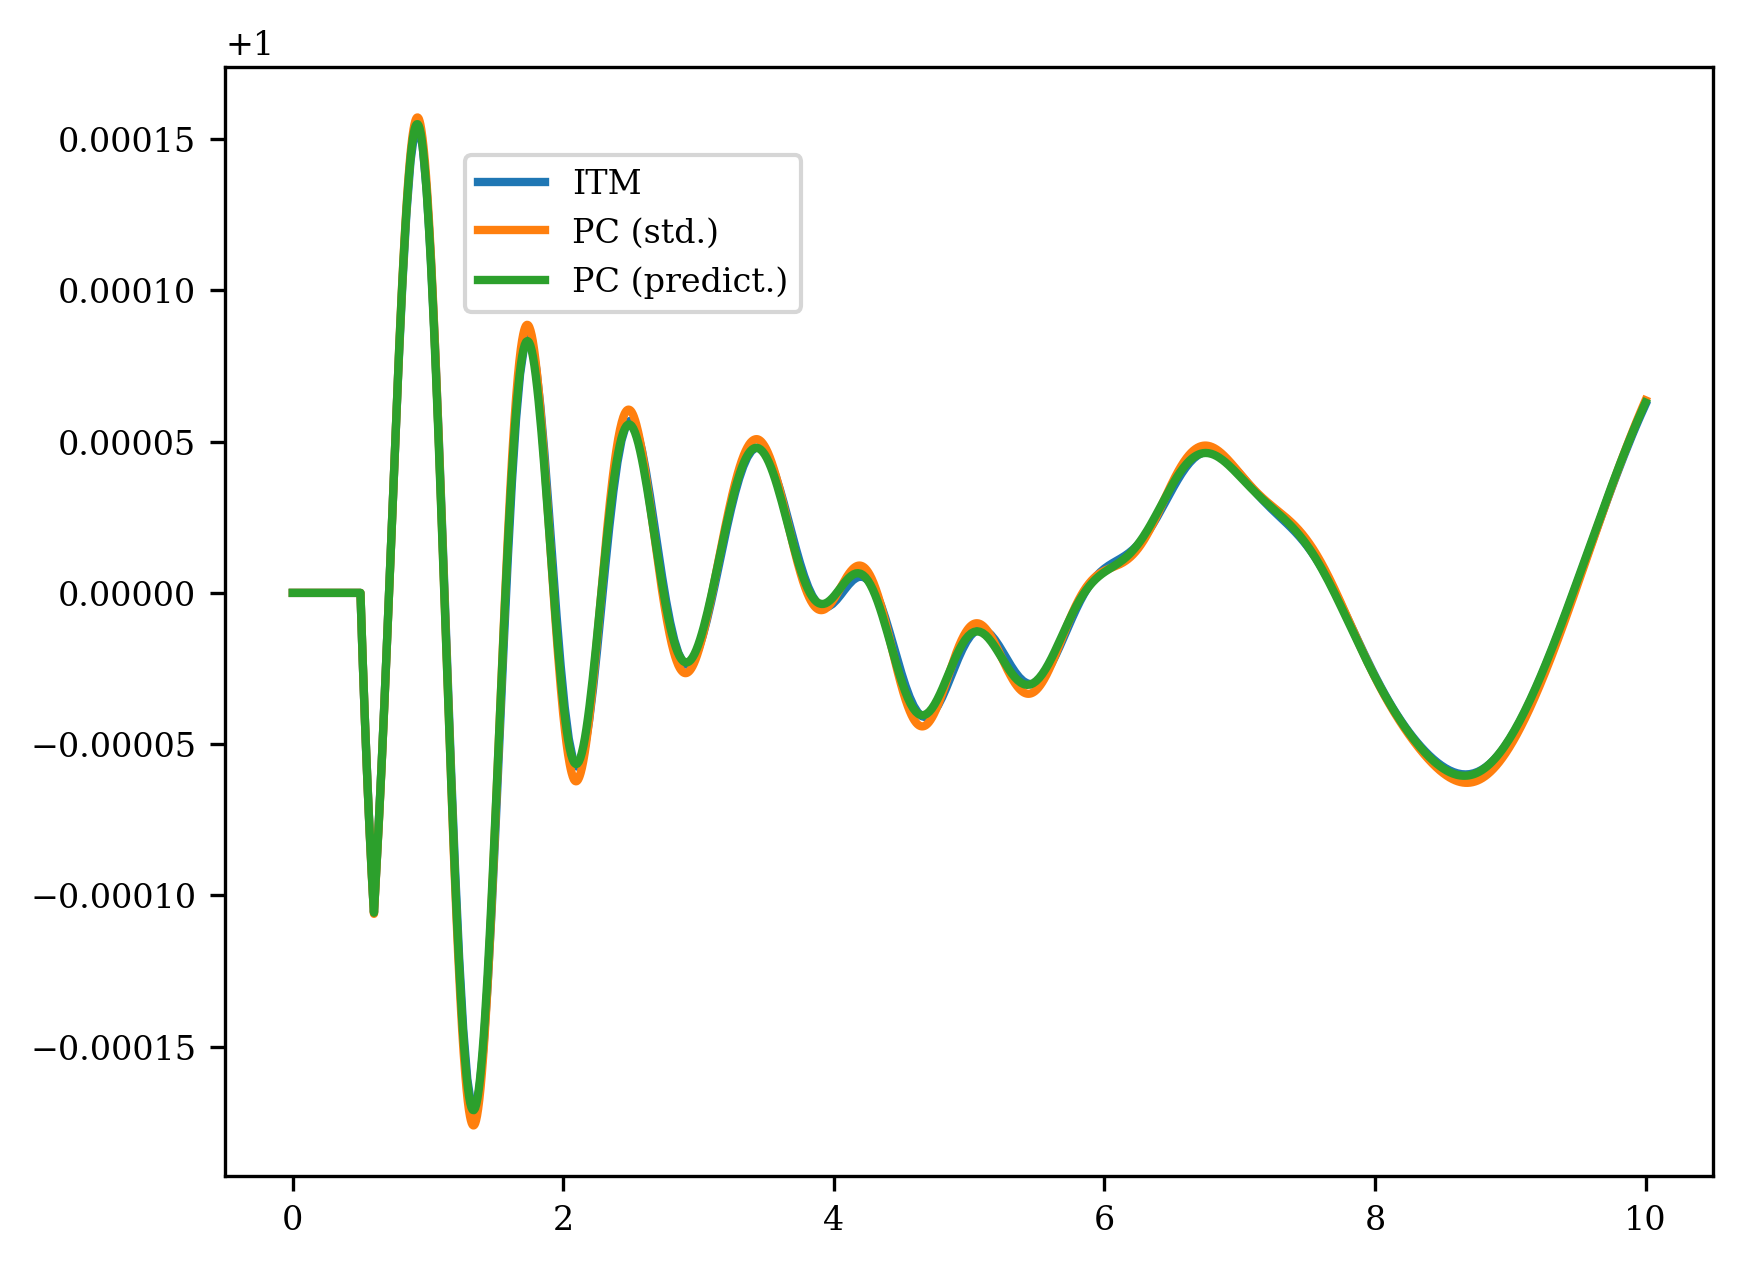

In [22]:
plt.plot(t_itm,omega_itm, label='ITM', linewidth=2)
plt.plot(t_pece_normal,omega_pece_normal, label='PC (std.)', linewidth=2)
plt.plot(t_pece_predict,omega_pece_predict, label='PC (predict.)', linewidth=2)
plt.legend(loc='center left', bbox_to_anchor=(0.15, 0.85))


Top 10 variables with largest differences:
Variable Var_341: Max difference = 1.38e-02
Variable Var_1099: Max difference = 1.22e-02
Variable Var_1180: Max difference = 1.22e-02
Variable Var_1107: Max difference = 1.11e-02
Variable Var_1188: Max difference = 1.11e-02
Variable Var_964: Max difference = 9.45e-03
Variable Var_972: Max difference = 7.70e-03
Variable Var_991: Max difference = 7.14e-03
Variable Var_999: Max difference = 6.56e-03
Variable Var_336: Max difference = 6.21e-03


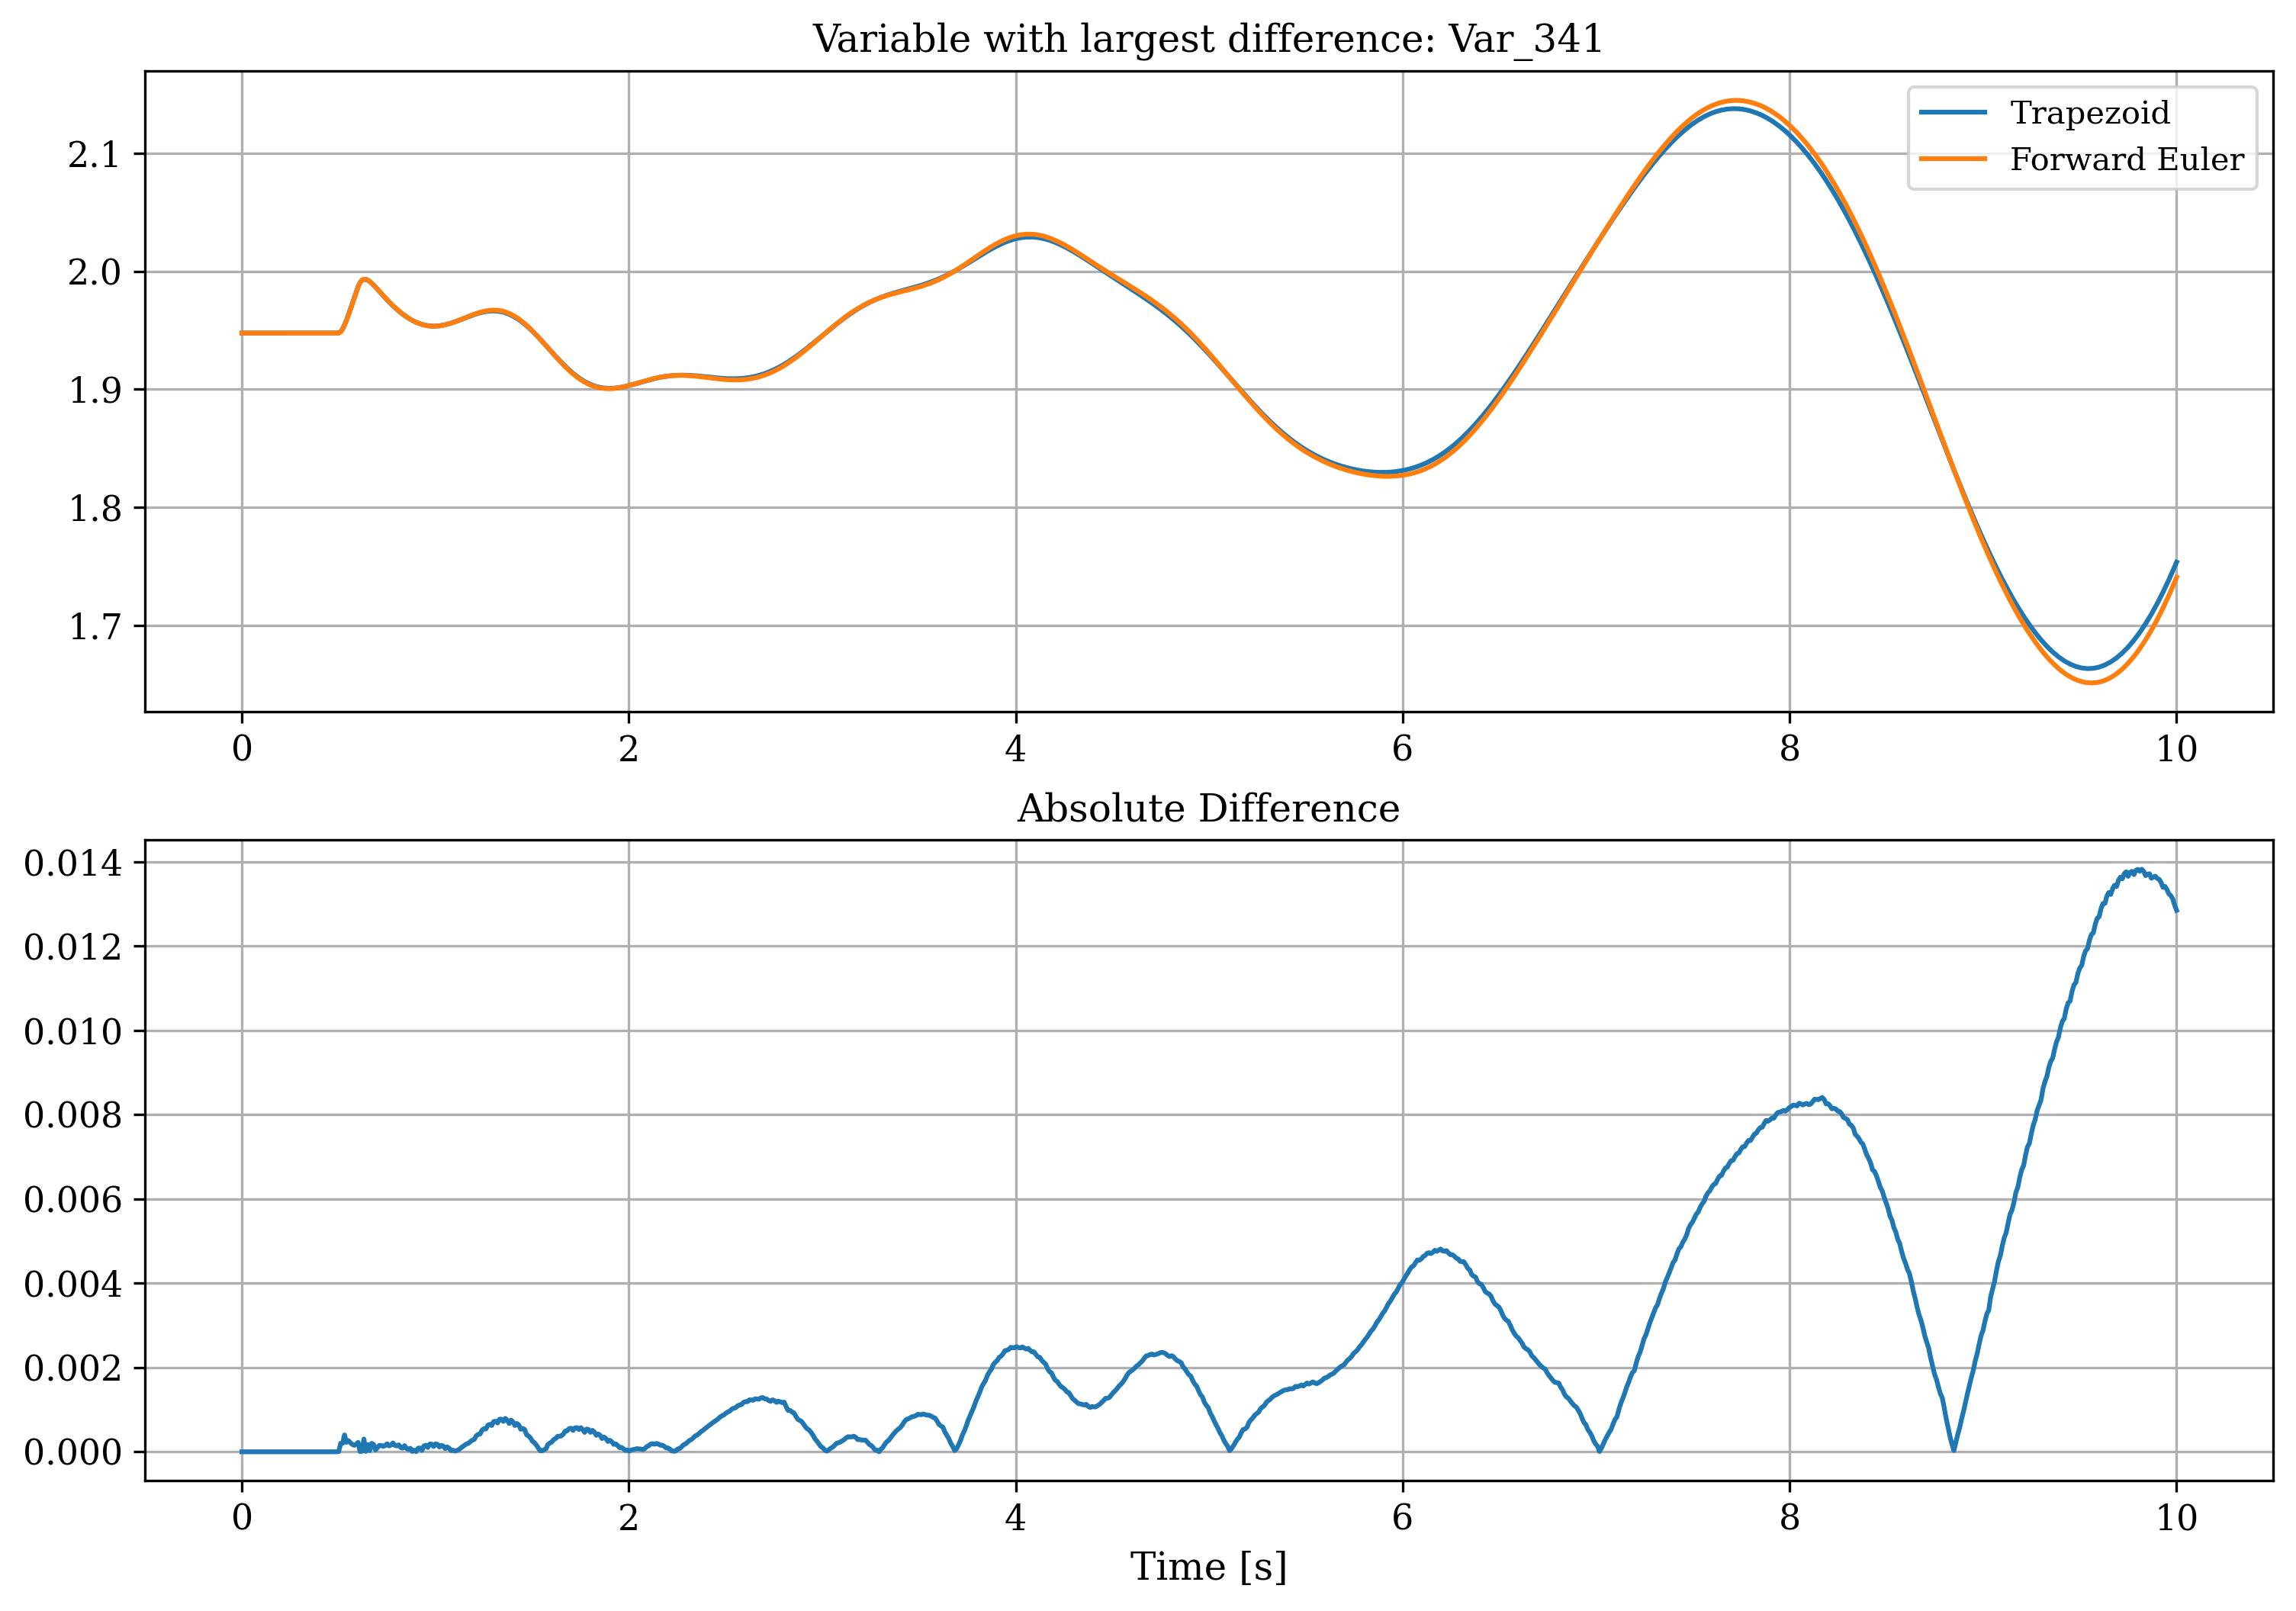

In [40]:
from scipy.interpolate import interp1d
# Create common time grid for interpolation
common_t = np.linspace(0, 10, 1000)

# Store maximum differences for all variables
max_diffs = []
for i in range(smib_pece_normal['data'].shape[1]):
    y1_interp = interp1d(var_itm[0,:], var_itm[i,:])(common_t)
    y2_interp_normal = interp1d(var_pece_normal[0,:], var_pece_normal[i,:])(common_t)
    max_diff = np.max(np.abs(y1_interp - y2_interp_normal))
    max_diffs.append((i, f"Var_{i}", max_diff))  # Using simple variable names like "Var_0", "Var_1", etc.

# Sort by difference magnitude and get top 10
top_diffs = sorted(max_diffs, key=lambda x: x[2], reverse=True)[:10]

# Print the top differences
print("\nTop 10 variables with largest differences:")
for idx, name, diff in top_diffs:
    print(f"Variable {name}: Max difference = {diff:.2e}")

# Plot the variable with the largest difference
worst_idx = top_diffs[0][0]
y1_interp = interp1d(var_itm[0,:], var_itm[worst_idx, :])(common_t)
y2_interp_normal = interp1d(var_pece_normal[0,:], var_pece_normal[worst_idx,:])(common_t)

plt.figure(figsize=(12, 8))
plt.subplot(211)
plt.plot(common_t, y1_interp, label='Trapezoid')
plt.plot(common_t, y2_interp_normal, label='Forward Euler')
plt.title(f'Variable with largest difference: {top_diffs[0][1]}')
plt.legend()
plt.grid(True)

plt.subplot(212)
plt.plot(common_t, np.abs(y1_interp - y2_interp_normal))
plt.title('Absolute Difference')
plt.xlabel('Time [s]')
plt.grid(True)
plt.show()


diff1 = np.copy(np.abs(y1_interp - y2_interp_normal))


Top 10 variables with largest differences:
Variable Var_1099: Max difference = 6.85e-03
Variable Var_1180: Max difference = 6.85e-03
Variable Var_1107: Max difference = 6.65e-03
Variable Var_1188: Max difference = 6.65e-03
Variable Var_964: Max difference = 5.17e-03
Variable Var_972: Max difference = 4.49e-03
Variable Var_991: Max difference = 3.97e-03
Variable Var_999: Max difference = 3.94e-03
Variable Var_1568: Max difference = 3.08e-03
Variable Var_822: Max difference = 2.69e-03


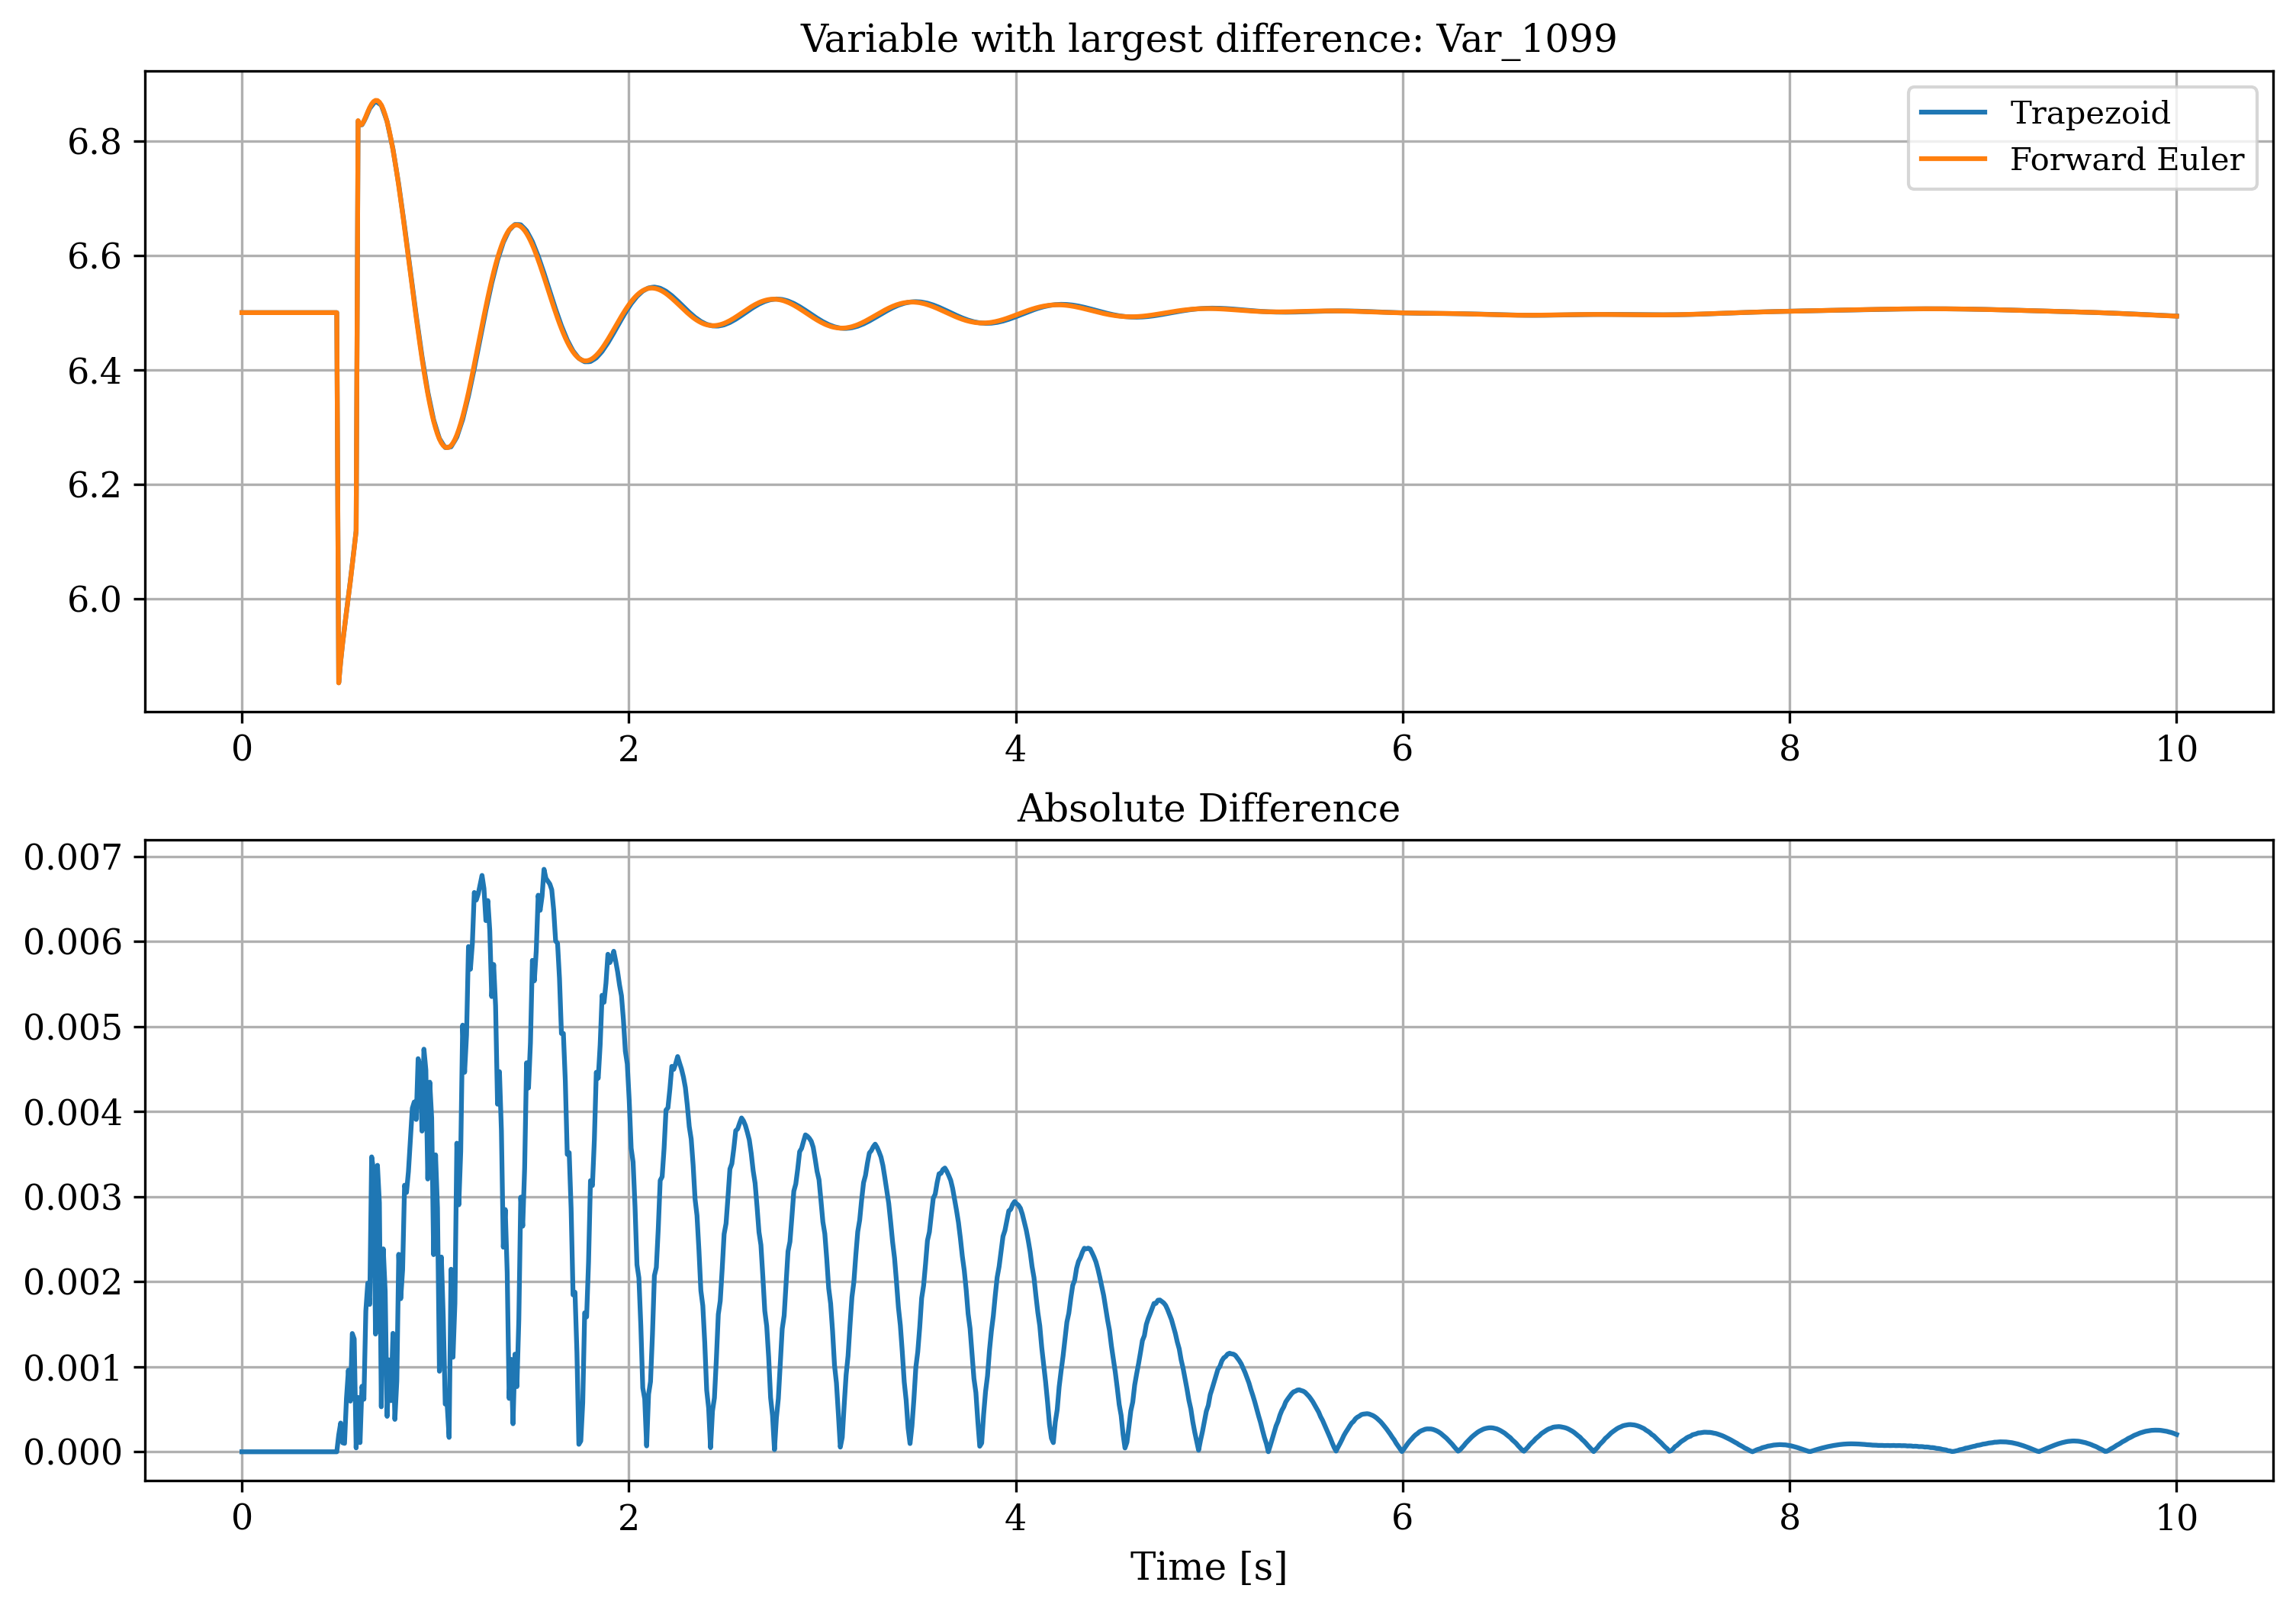

In [41]:
from scipy.interpolate import interp1d
# Create common time grid for interpolation
common_t = np.linspace(0, 10, 1000)

# Store maximum differences for all variables
max_diffs = []
for i in range(smib_pece_normal['data'].shape[1]):
    y1_interp = interp1d(var_itm[0,:], var_itm[i,:])(common_t)
    y2_interp_predict = interp1d(var_pece_predict[0,:], var_pece_predict[i,:])(common_t)
    max_diff = np.max(np.abs(y1_interp - y2_interp_predict))
    max_diffs.append((i, f"Var_{i}", max_diff))  # Using simple variable names like "Var_0", "Var_1", etc.

# Sort by difference magnitude and get top 10
top_diffs = sorted(max_diffs, key=lambda x: x[2], reverse=True)[:10]

# Print the top differences
print("\nTop 10 variables with largest differences:")
for idx, name, diff in top_diffs:
    print(f"Variable {name}: Max difference = {diff:.2e}")

# Plot the variable with the largest difference
worst_idx = top_diffs[0][0]
y1_interp = interp1d(var_itm[0,:], var_itm[worst_idx, :])(common_t)
y2_interp_predict = interp1d(var_pece_predict[0,:], var_pece_predict[worst_idx,:])(common_t)

plt.figure(figsize=(12, 8))
plt.subplot(211)
plt.plot(common_t, y1_interp, label='Trapezoid')
plt.plot(common_t, y2_interp_predict, label='Forward Euler')
plt.title(f'Variable with largest difference: {top_diffs[0][1]}')
plt.legend()
plt.grid(True)

plt.subplot(212)
plt.plot(common_t, np.abs(y1_interp - y2_interp_predict))
plt.title('Absolute Difference')
plt.xlabel('Time [s]')
plt.grid(True)
plt.show()

diff2 = np.copy(np.abs(y1_interp - y2_interp_predict))

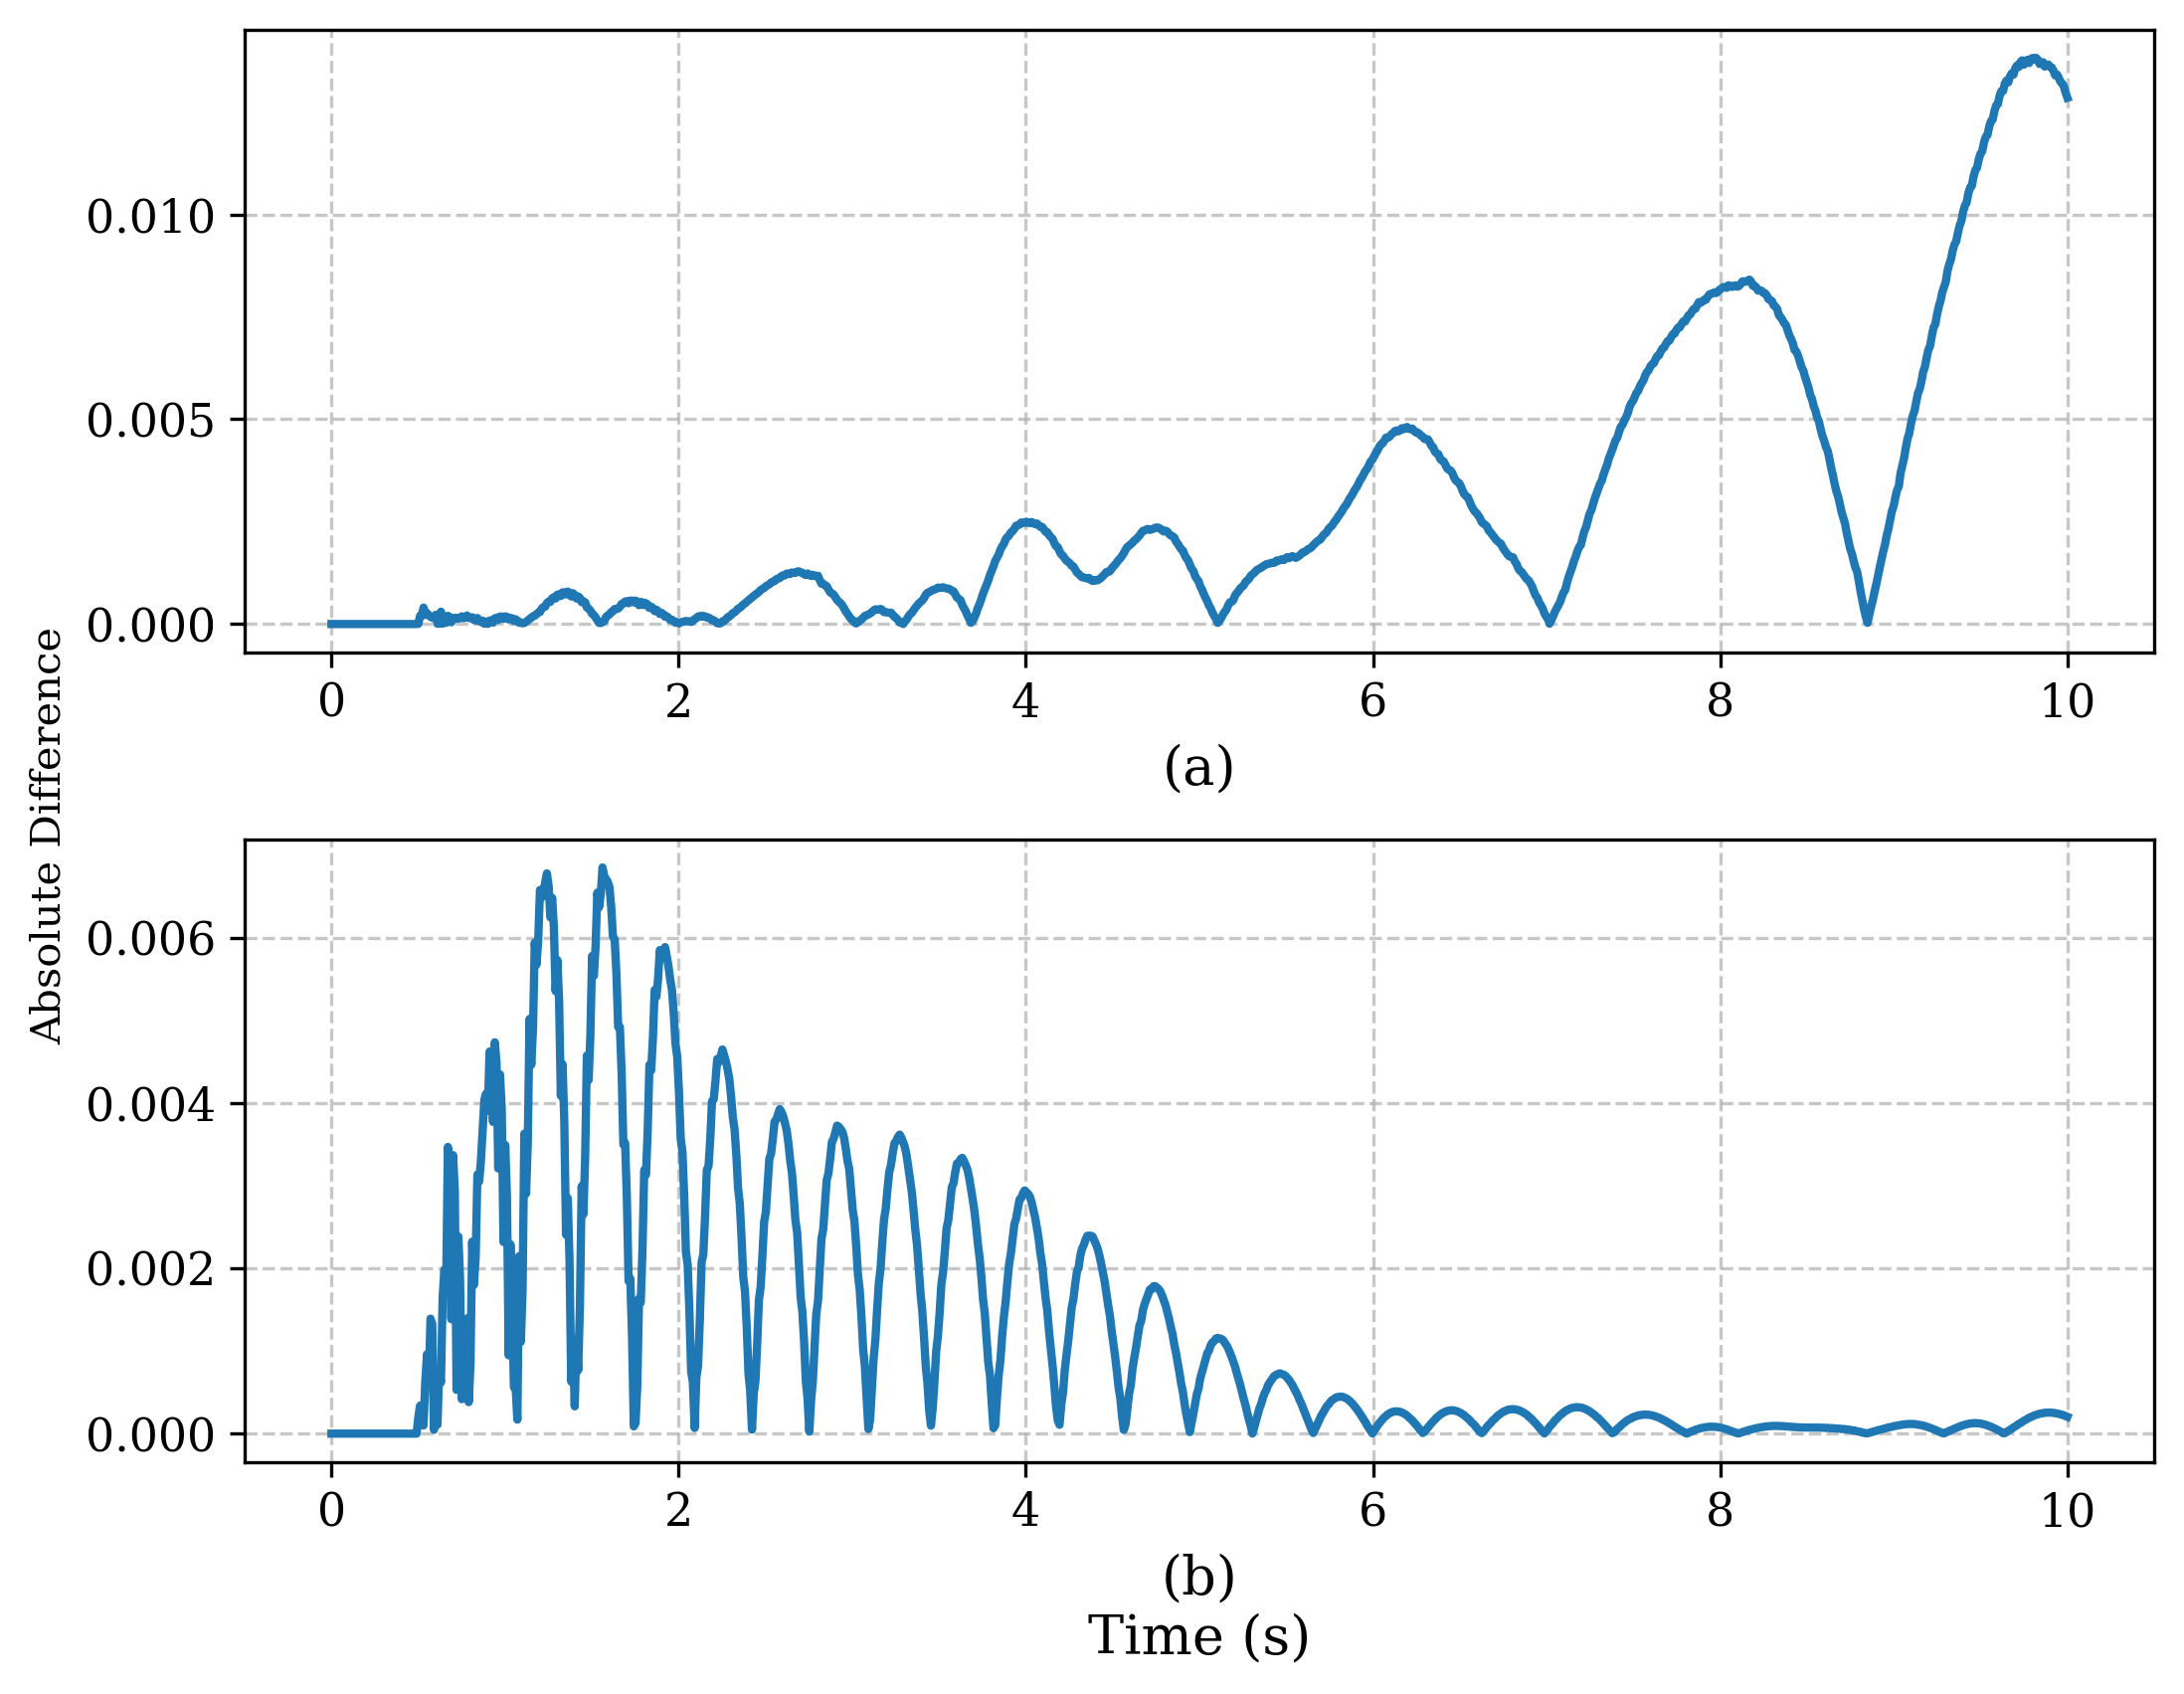

In [47]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec


# Update rcParams for consistent style across the plot
plt.rcParams.update({
    "font.family": "serif",  # Use a serif font like Times New Roman
    "font.size": 14,         # Set font size appropriate for academic papers
    "axes.titlesize": 12,    # Title font size
    "axes.labelsize": 13,    # Axis label font size
    "xtick.labelsize": 11,    # X-tick label size
    "ytick.labelsize": 11,    # Y-tick label size
    "legend.fontsize": 10,    # Legend font size
    "figure.dpi": 300,       # High resolution for publications
    "savefig.format": "png", # Default format for saving
    "savefig.dpi": 300,      # Save figures with high resolution
    "text.usetex": False     # Turn off LaTeX for simplicity (can enable if needed)
})

common_t = np.linspace(0, 10, 1000)

# Create subplots
# fig, axs = plt.subplots(2, 1, figsize=(8, 6), sharex=False)

# axs[0].plot(common_t, diff1, linewidth = 1.5)
# axs[0].set_xlabel('(a)')
# # axs[0].set_ylabel('Step Size (s)')
# axs[0].grid(True, linestyle='--', alpha=0.7)  # Add gridlines

# axs[1].plot(common_t, diff2, linewidth = 1.5)
# axs[1].set_xlabel('(b)\n')
# axs[1].grid(True, linestyle='--', alpha=0.7)  # Add gridlines


# # Adjust layout
# fig.tight_layout()

# # Optional: Add shared labels for the figure
# fig.supxlabel("Time (s)", fontsize=10)
# fig.supylabel(" Absolute Difference", fontsize=10)

# # Save or show the figure
# # plt.savefig("example_figure.png", bbox_inches="tight")  # Save the figure
# plt.show()  # Show the figure

# # plt.savefig("smib_dt.pdf")




fig = plt.figure(figsize=(8, 6))
gs = gridspec.GridSpec(2, 1)
gs.update(left=0.15, right=0.95, bottom=0.15, top=0.95, hspace=0.3)

# Create subplots using GridSpec
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])

# Plot data
ax1.plot(common_t, diff1, linewidth=2)
ax1.set_xlabel('(a)')
ax1.grid(True, linestyle='--', alpha=0.7)

ax2.plot(common_t, diff2, linewidth=2)
ax2.set_xlabel('(b)\nTime (s)')
ax2.grid(True, linestyle='--', alpha=0.7)

# Add shared y-label with more space
fig.text(0.06, 0.5, 'Absolute Difference', rotation=90, va='center', fontsize=10)

# plt.show()

plt.savefig("npcc_diff_improved.pdf")

In [26]:
ieee_itm = np.load("ieee14_gentrip0_out_itm.npz")
ieee_pece_normal = np.load("ieee14_gentrip0_out_pece_normal.npz")
ieee_pece_predict = np.load("ieee14_gentrip0_out_pece_predict.npz")

In [47]:
t_itm = [arr[0] for arr in ieee_itm['data']]
t_pece_normal = [arr[0] for arr in ieee_pece_normal['data']]
t_pece_predict = [arr[0] for arr in ieee_pece_predict['data']]

In [51]:
var_itm = np.array(ieee_itm['data']).T 
var_pece_normal = np.array(ieee_pece_normal['data']).T 
var_pece_predict = np.array(ieee_pece_predict['data']).T 

In [ ]:
from scipy.interpolate import interp1d
# Create common time grid for interpolation
common_t = np.linspace(0, 10, 1000)

# Store maximum differences for all variables
max_diffs = []
for i in range(ieee_pece_normal['data'].shape[1]):
    y1_interp = interp1d(var_itm[0,:], var_itm[i,:])(common_t)
    y2_interp_normal = interp1d(var_pece_normal[0,:], var_pece_normal[i,:])(common_t)
    max_diff = np.max(np.abs(y1_interp - y2_interp_normal))
    max_diffs.append((i, f"Var_{i}", max_diff))  # Using simple variable names like "Var_0", "Var_1", etc.

# Sort by difference magnitude and get top 10
top_diffs = sorted(max_diffs, key=lambda x: x[2], reverse=True)[:10]

# Print the top differences
print("\nTop 10 variables with largest differences:")
for idx, name, diff in top_diffs:
    print(f"Variable {name}: Max difference = {diff:.2e}")

# Plot the variable with the largest difference
worst_idx = top_diffs[0][0]
y1_interp = interp1d(var_itm[0,:], var_itm[worst_idx, :])(common_t)
y2_interp_normal = interp1d(var_pece_normal[0,:], var_pece_normal[worst_idx,:])(common_t)

plt.figure(figsize=(12, 8))
plt.subplot(211)
plt.plot(common_t, y1_interp, label='Trapezoid')
plt.plot(common_t, y2_interp_normal, label='Forward Euler')
plt.title(f'Variable with largest difference: {top_diffs[0][1]}')
plt.legend()
plt.grid(True)

plt.subplot(212)
plt.plot(common_t, np.abs(y1_interp - y2_interp_normal))
plt.title('Absolute Difference')
plt.xlabel('Time [s]')
plt.grid(True)
plt.show()


diff1 = np.copy(np.abs(y1_interp - y2_interp_normal))

In [ ]:
from scipy.interpolate import interp1d
# Create common time grid for interpolation
common_t = np.linspace(0, 10, 1000)

# Store maximum differences for all variables
max_diffs = []
for i in range(ieee_pece_normal['data'].shape[1]):
    y1_interp = interp1d(var_itm[0,:], var_itm[i,:])(common_t)
    y2_interp_predict = interp1d(var_pece_predict[0,:], var_pece_predict[i,:])(common_t)
    max_diff = np.max(np.abs(y1_interp - y2_interp_predict))
    max_diffs.append((i, f"Var_{i}", max_diff))  # Using simple variable names like "Var_0", "Var_1", etc.

# Sort by difference magnitude and get top 10
top_diffs = sorted(max_diffs, key=lambda x: x[2], reverse=True)[:10]

# Print the top differences
print("\nTop 10 variables with largest differences:")
for idx, name, diff in top_diffs:
    print(f"Variable {name}: Max difference = {diff:.2e}")

# Plot the variable with the largest difference
worst_idx = top_diffs[0][0]
y1_interp = interp1d(var_itm[0,:], var_itm[worst_idx, :])(common_t)
y2_interp_predict = interp1d(var_pece_predict[0,:], var_pece_predict[worst_idx,:])(common_t)

plt.figure(figsize=(12, 8))
plt.subplot(211)
plt.plot(common_t, y1_interp, label='Trapezoid')
plt.plot(common_t, y2_interp_predict, label='Forward Euler')
plt.title(f'Variable with largest difference: {top_diffs[0][1]}')
plt.legend()
plt.grid(True)

plt.subplot(212)
plt.plot(common_t, np.abs(y1_interp - y2_interp_predict))
plt.title('Absolute Difference')
plt.xlabel('Time [s]')
plt.grid(True)
plt.show()

diff2 = np.copy(np.abs(y1_interp - y2_interp_predict))

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec


# Update rcParams for consistent style across the plot
plt.rcParams.update({
    "font.family": "serif",  # Use a serif font like Times New Roman
    "font.size": 12,         # Set font size appropriate for academic papers
    "axes.titlesize": 12,    # Title font size
    "axes.labelsize": 10,    # Axis label font size
    "xtick.labelsize": 8,    # X-tick label size
    "ytick.labelsize": 8,    # Y-tick label size
    "legend.fontsize": 8,    # Legend font size
    "figure.dpi": 300,       # High resolution for publications
    "savefig.format": "png", # Default format for saving
    "savefig.dpi": 300,      # Save figures with high resolution
    "text.usetex": False     # Turn off LaTeX for simplicity (can enable if needed)
})

common_t = np.linspace(0, 5, 1000)

# Create subplots
# fig, axs = plt.subplots(2, 1, figsize=(8, 6), sharex=False)

# axs[0].plot(common_t, diff1, linewidth = 1.5)
# axs[0].set_xlabel('(a)')
# # axs[0].set_ylabel('Step Size (s)')
# axs[0].grid(True, linestyle='--', alpha=0.7)  # Add gridlines

# axs[1].plot(common_t, diff2, linewidth = 1.5)
# axs[1].set_xlabel('(b)\n')
# axs[1].grid(True, linestyle='--', alpha=0.7)  # Add gridlines


# # Adjust layout
# fig.tight_layout()

# # Optional: Add shared labels for the figure
# fig.supxlabel("Time (s)", fontsize=10)
# fig.supylabel(" Absolute Difference", fontsize=10)

# # Save or show the figure
# # plt.savefig("example_figure.png", bbox_inches="tight")  # Save the figure
# plt.show()  # Show the figure

# # plt.savefig("smib_dt.pdf")




fig = plt.figure(figsize=(8, 6))
gs = gridspec.GridSpec(2, 1)
gs.update(left=0.15, right=0.95, bottom=0.15, top=0.95, hspace=0.3)

# Create subplots using GridSpec
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])

# Plot data
ax1.plot(common_t, diff1, linewidth=1.5)
ax1.set_xlabel('(a)')
ax1.grid(True, linestyle='--', alpha=0.7)

ax2.plot(common_t, diff2, linewidth=1.5)
ax2.set_xlabel('(b)\nTime (s)')
ax2.grid(True, linestyle='--', alpha=0.7)

# Add shared y-label with more space
fig.text(0.06, 0.5, 'Absolute Difference', rotation=90, va='center', fontsize=10)

plt.show()

# plt.savefig("npcc_diff.pdf")

In [28]:
diff1 = np.copy(np.abs(y1_interp - y2_interp_normal))

diff1

array([4.55238587, 4.55238587, 4.55238587, 4.55238587, 4.55238587,
       4.55238587, 4.55238587, 4.55238587, 4.55238587, 4.55238587,
       4.55238587, 4.55238587, 4.55238587, 4.55238587, 4.55238587,
       4.55238587, 4.55238587, 4.55238587, 4.55238587, 4.55238587,
       4.55238587, 4.55238587, 4.55238587, 4.55238587, 4.55238587,
       4.55238587, 4.55238587, 4.55238587, 4.55238587, 4.55238587,
       4.55238587, 4.55238587, 4.55238587, 4.55238587, 4.55238587,
       4.55238587, 4.55238587, 4.55238587, 4.55238587, 4.55238587,
       4.55238587, 4.55238587, 4.55238587, 4.55238587, 4.55238587,
       4.55238587, 4.55238587, 4.55238587, 4.55238587, 4.55238587,
       3.90482974, 3.94108115, 3.97053896, 3.99525094, 4.01848865,
       4.04099229, 4.06315498, 4.08735181, 4.11188644, 4.13646564,
       4.84857456, 4.83786876, 4.83621659, 4.84128245, 4.84816488,
       4.85678751, 4.86573415, 4.87155332, 4.8775691 , 4.88328495,
       4.88282378, 4.88236736, 4.88149112, 4.87392673, 4.86632

/var/folders/7y/jwv7w0wx6kx20g0hr2g6mz3c0000gn/T/ipykernel_86006/1424295641.py:2: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(diff2))


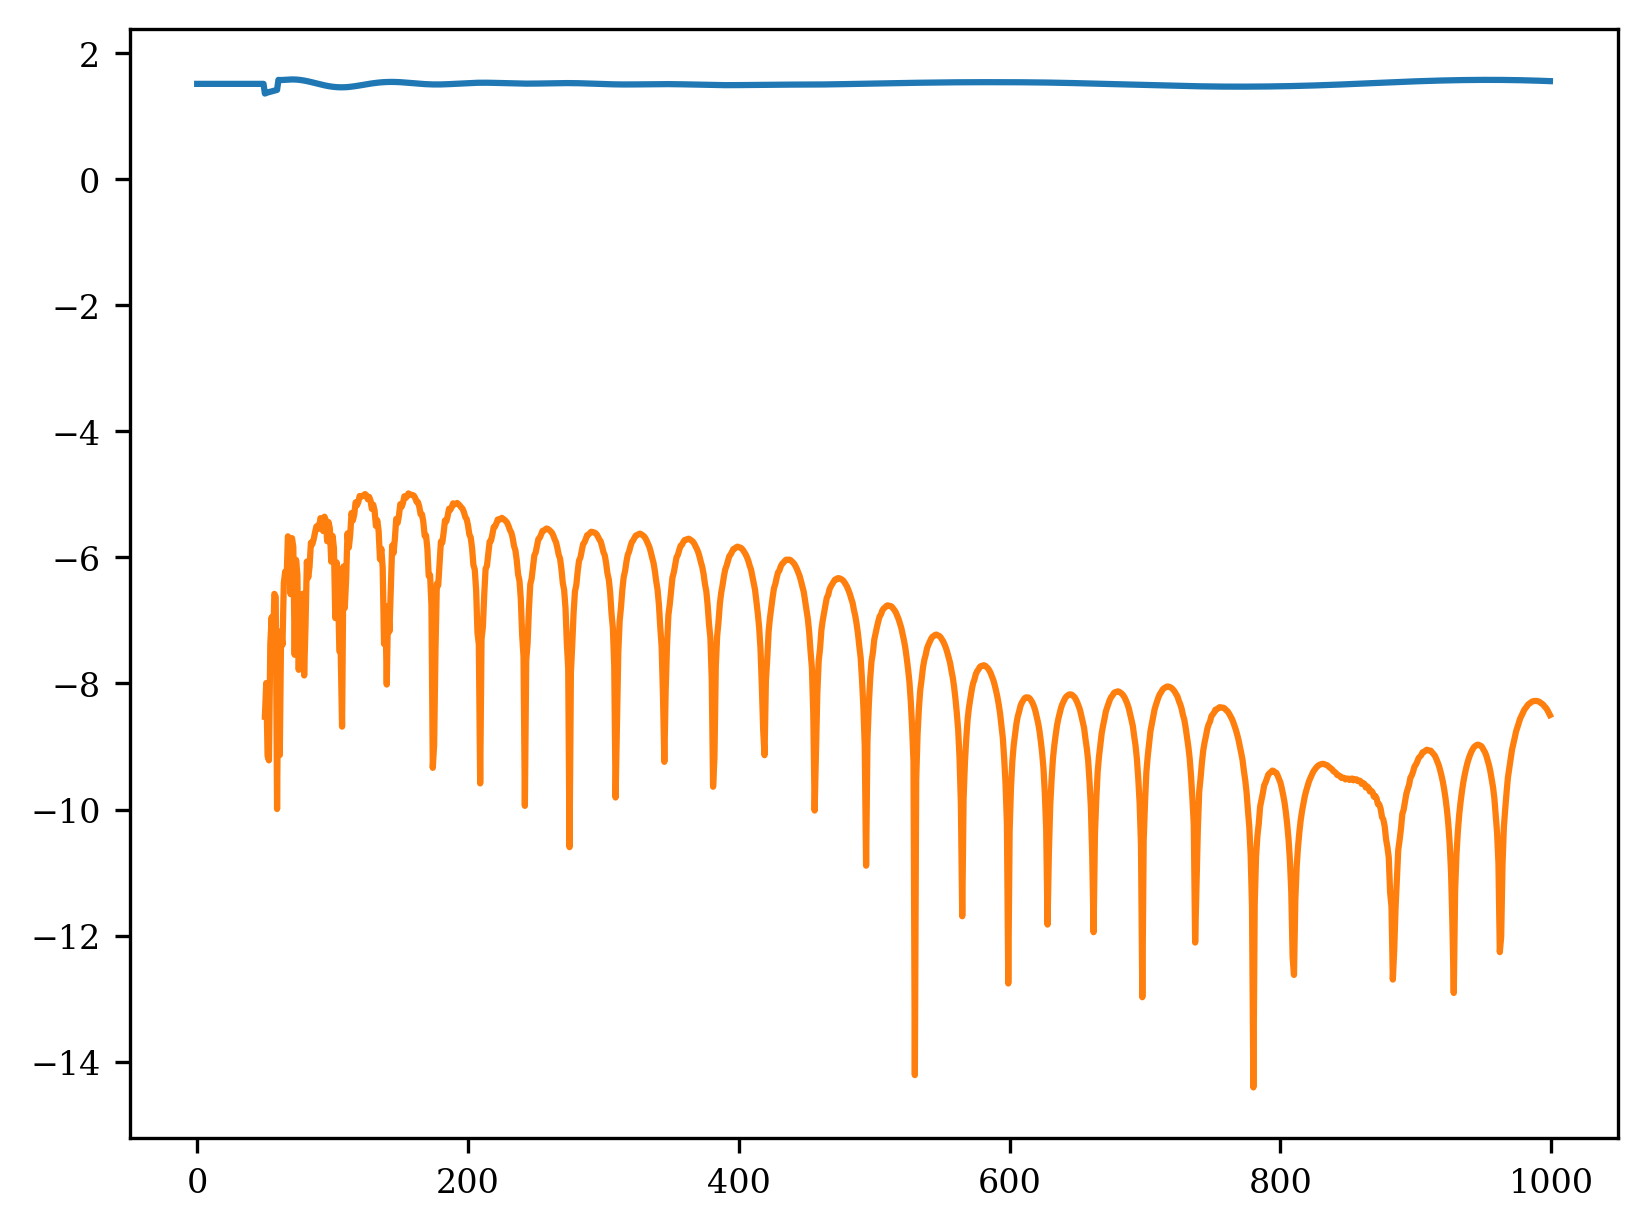

In [33]:
plt.plot(np.log(diff1), label = "")
plt.plot(np.log(diff2), label = "")

In [51]:
def mysum():
    s = 0.0
    for i in range(int(1e6)):
        s += i
    return s


499999500000.0

In [52]:
timeit(mysum)

8.93 ns ± 0.0633 ns per loop (mean ± std. dev. of 7 runs, 100,000,000 loops each)
